In [49]:
!pip install keras
!pip install pillow
!pip install tqdm
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl+t
%matplotlib inline
import pickle
from tqdm import tqdm
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector, Merge, Activation, Flatten
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
import nltk
from keras.layers.merge import add


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [6]:
token = 'Flickr8k_text/Flickr8k.token.txt'

In [7]:
captions = open(token, 'r').read().strip().split('\n')

## Creating a dictionary containing all the captions of the images

In [9]:
check = {}
for i, row in enumerate(captions):
    print(i)
    row = row.split('\t')
    print(row)
    row[0] = row[0][:len(row[0])-2]
    if row[0] in check:
        check[row[0]].append(row[1])
    else:
        check[row[0]] = [row[1]]
check['667626_18933d713e.jpg']

0
['1000268201_693b08cb0e.jpg#0', 'A child in a pink dress is climbing up a set of stairs in an entry way .']
1
['1000268201_693b08cb0e.jpg#1', 'A girl going into a wooden building .']
2
['1000268201_693b08cb0e.jpg#2', 'A little girl climbing into a wooden playhouse .']
3
['1000268201_693b08cb0e.jpg#3', 'A little girl climbing the stairs to her playhouse .']
4
['1000268201_693b08cb0e.jpg#4', 'A little girl in a pink dress going into a wooden cabin .']
5
['1001773457_577c3a7d70.jpg#0', 'A black dog and a spotted dog are fighting']
6
['1001773457_577c3a7d70.jpg#1', 'A black dog and a tri-colored dog playing with each other on the road .']
7
['1001773457_577c3a7d70.jpg#2', 'A black dog and a white dog with brown spots are staring at each other in the street .']
8
['1001773457_577c3a7d70.jpg#3', 'Two dogs of different breeds looking at each other on the road .']
9
['1001773457_577c3a7d70.jpg#4', 'Two dogs on pavement moving toward each other .']
10
['1002674143_1b742ab4b8.jpg#0', 'A little

['1121416483_c7902d0d49.jpg#1', 'A little girl standing on her head .']
567
['1121416483_c7902d0d49.jpg#2', 'A small child doing a handstand on a bed .']
568
['1121416483_c7902d0d49.jpg#3', 'A young girl does a handstand on a bed with blue sheets .']
569
['1121416483_c7902d0d49.jpg#4', 'The girl is upside down on a bed']
570
['112178718_87270d9b4d.jpg#0', 'A guy stands in the sand with a snowboard behind him .']
571
['112178718_87270d9b4d.jpg#1', 'A man holds a surfboard on the beach .']
572
['112178718_87270d9b4d.jpg#2', 'a man holds his snowboard in the sand .']
573
['112178718_87270d9b4d.jpg#3', 'A man with his surfboard stands in the sand .']
574
['112178718_87270d9b4d.jpg#4', 'Man is standing on white sand and holding a snowboard .']
575
['112243673_fd68255217.jpg#0', 'People on ATVs and dirt bikes are traveling along a worn path in a field surrounded by trees .']
576
['112243673_fd68255217.jpg#1', "Three people are riding around on ATV 's and motorcycles ."]
577
['112243673_fd682

['1248940539_46d33ed487.jpg#0', 'Three children are playing in sand near to the beach .']
1041
['1248940539_46d33ed487.jpg#1', 'Three children playing in sand at beach']
1042
['1248940539_46d33ed487.jpg#2', 'Three girls play in the sand .']
1043
['1248940539_46d33ed487.jpg#3', 'Three little blond girls , two in blue , one in pink , play on a sunny beach .']
1044
['1248940539_46d33ed487.jpg#4', 'Three young girls dance on the beach in the sand .']
1045
['1248953128_24c9f8d924.jpg#0', 'A little girl in a colorful dress is playing with a blue and red soccer ball .']
1046
['1248953128_24c9f8d924.jpg#1', 'A little girl in a dress playing with a soccer ball .']
1047
['1248953128_24c9f8d924.jpg#2', 'Girls in brightly-colred clothes plays with a blue ball .']
1048
['1248953128_24c9f8d924.jpg#3', 'The young girl is kicking a blue and red soccer ball .']
1049
['1248953128_24c9f8d924.jpg#4', 'Young girl in blue dress stepping over a soccer ball .']
1050
['124972799_de706b6d0b.jpg#0', 'A cat under

['1332722096_1e3de8ae70.jpg#4', 'Two young ladies in green boots are walking through an urban area while an older lady wearing black shoes follows them .']
1510
['1332815795_8eea44375e.jpg#0', 'A baby swings in a swing near a wooden fence .']
1511
['1332815795_8eea44375e.jpg#1', 'A baby wearing all white swinging on a swing .']
1512
['1332815795_8eea44375e.jpg#2', 'A little girl is swinging in a baby swing on the playground .']
1513
['1332815795_8eea44375e.jpg#3', "A little girl rides in a child 's swing ."]
1514
['1332815795_8eea44375e.jpg#4', 'a young baby girl wearing a white outfit swinging in a baby swing']
1515
['1332823164_c70a5d930e.jpg#0', 'A girl standing in the ocean']
1516
['1332823164_c70a5d930e.jpg#1', 'a girl walks in the ocean .']
1517
['1332823164_c70a5d930e.jpg#2', 'A woman in a red jacket stands on the beach facing the water as it covers her feet .']
1518
['1332823164_c70a5d930e.jpg#3', 'A woman is watching the tide .']
1519
['1332823164_c70a5d930e.jpg#4', 'Woman sta

['1404832008_68e432665b.jpg#4', 'A man wearing bathing trunks is parasailing in the water .']
2015
['1405221276_21634dcd58.jpg#0', 'One dog shaking the water off , getting a second dog wet']
2016
['1405221276_21634dcd58.jpg#1', 'Two dogs are shaking off water while playing with a ball on the edge of a body of water .']
2017
['1405221276_21634dcd58.jpg#2', 'Two dogs shake off water in an area with very little vegetation .']
2018
['1405221276_21634dcd58.jpg#3', 'Two dogs shaking off water droplets on a beach .']
2019
['1405221276_21634dcd58.jpg#4', 'Two dogs shaking themselves dry on the sand .']
2020
['140526326_da07305c1c.jpg#0', 'A man rock climbs with a city and body of water in the background .']
2021
['140526326_da07305c1c.jpg#1', 'A man with a harness and rope attached to his waist is standing on top of a mountain overlooking water .']
2022
['140526326_da07305c1c.jpg#2', 'A rock climber pauses to look out over the ocean .']
2023
['140526326_da07305c1c.jpg#3', 'The male rock climbe

['1465666502_de289b3b9c.jpg#0', 'A black dog is swimming in green water with something in its mouth .']
2506
['1465666502_de289b3b9c.jpg#1', 'A black dog playing in a river .']
2507
['1465666502_de289b3b9c.jpg#2', 'a black dog wearing a red collar is dragging a rope though a river .']
2508
['1465666502_de289b3b9c.jpg#3', 'A black dog with a red collar retrieving a stick from deep water .']
2509
['1465666502_de289b3b9c.jpg#4', 'The black dog emerges from the water having collected an object in his teeth .']
2510
['146577645_91b570c0d0.jpg#0', 'A kayaker goes through the waves holding his paddle .']
2511
['146577645_91b570c0d0.jpg#1', 'A man paddles down the rapids in a kayak .']
2512
['146577645_91b570c0d0.jpg#2', 'A man with a red helmet kayaking .']
2513
['146577645_91b570c0d0.jpg#3', 'A person maneuvers rapids while riding a watercraft .']
2514
['146577645_91b570c0d0.jpg#4', 'Man kayaking through rough waters .']
2515
['146577646_9e64b8c2dc.jpg#0', 'A kayaker is battling waves in a p

['1564614124_0ee6799935.jpg#1', 'A girl playing with a stretchy charm bracelet .']
3007
['1564614124_0ee6799935.jpg#2', 'A girl plays with a necklace as the sun shines behind her .']
3008
['1564614124_0ee6799935.jpg#3', 'A girl with the sun behind her plays with some jewelry .']
3009
['1564614124_0ee6799935.jpg#4', 'A little girl examines a piece of jewelry .']
3010
['1566117559_f5d98fbeb0.jpg#0', 'A little white dog begs .']
3011
['1566117559_f5d98fbeb0.jpg#1', 'A little white dog with long fur stands on his hind legs .']
3012
['1566117559_f5d98fbeb0.jpg#2', 'A small white dog stands on its hind legs .']
3013
['1566117559_f5d98fbeb0.jpg#3', 'A white , fluffy dog is standing on its hind legs .']
3014
['1566117559_f5d98fbeb0.jpg#4', 'The white dog is begging .']
3015
['1569562856_eedb5a0a1f.jpg#0', 'A man in a black jacket is has a white headphone in his ear .']
3016
['1569562856_eedb5a0a1f.jpg#1', 'A man in a black jacket is in front of a map .']
3017
['1569562856_eedb5a0a1f.jpg#2', 'a

3572
['1798209205_77dbf525b0.jpg#2', 'A lady in the kitchen is pouring wine .']
3573
['1798209205_77dbf525b0.jpg#3', 'A woman in a restaurant pouring wine into a clear glass .']
3574
['1798209205_77dbf525b0.jpg#4', 'A woman with a tag is pouring red wine in a glass']
3575
['1798215547_ef7ad95be8.jpg#0', 'A boy wearing navy blue slides down a gray slide .']
3576
['1798215547_ef7ad95be8.jpg#1', 'A boy with laying on his stomach with his arms in front of him .']
3577
['1798215547_ef7ad95be8.jpg#2', 'A child sliding face first down a metal tube']
3578
['1798215547_ef7ad95be8.jpg#3', 'A little boy in black slides headfirst down a tan tube with his mouth open wide .']
3579
['1798215547_ef7ad95be8.jpg#4', 'A young boy going headfirst down a slide .']
3580
['179829865_095b040377.jpg#0', 'A man beginning to waterski wearing a red life jacket .']
3581
['179829865_095b040377.jpg#1', 'A man holds on to a handle in the water .']
3582
['179829865_095b040377.jpg#2', 'A man waterskies .']
3583
['17982

4012
['1956678973_223cb1b847.jpg#2', 'Several children leaping into a pile of leaves on the ground .']
4013
['1956678973_223cb1b847.jpg#3', 'Small children are playing in a pile of dead leaves .']
4014
['1956678973_223cb1b847.jpg#4', 'Three kids jumping in leaves .']
4015
['1956944011_c5661d3f22.jpg#0', 'A child wearing a white shirt hangs from the playground equipment .']
4016
['1956944011_c5661d3f22.jpg#1', 'The child in white is on the monkey bars , while the one in brown stands below .']
4017
['1956944011_c5661d3f22.jpg#2', 'Two children are playing on monkey bars .']
4018
['1956944011_c5661d3f22.jpg#3', 'Two children playing on a jungle gym .']
4019
['1956944011_c5661d3f22.jpg#4', 'Two children playing on an orange jungle gym in the winter time .']
4020
['1957371533_62bc720bac.jpg#0', 'A black and white dog shakes itself to get the water off']
4021
['1957371533_62bc720bac.jpg#1', 'A black and white dog shakes water off itself .']
4022
['1957371533_62bc720bac.jpg#2', 'A dog shaking

['2071309418_1d7580b0f0.jpg#4', 'Two dogs , one wearing christmas antlers , tussle on the grass .']
4565
['207237775_fa0a15c6fe.jpg#0', 'A man doing a back flip while another takes a picture .']
4566
['207237775_fa0a15c6fe.jpg#1', 'A person is taking a picture of another person doing a flip in midair in the grass .']
4567
['207237775_fa0a15c6fe.jpg#2', 'A young man takes a picture of his friend doing gymnastics in a field']
4568
['207237775_fa0a15c6fe.jpg#3', 'One man taking a photo of another man jumping in a field by a small tree .']
4569
['207237775_fa0a15c6fe.jpg#4', 'One person does a flip in the middle of the field while their friend takes a picture .']
4570
['2072574835_febf0c5fb9.jpg#0', 'Dogs in a race .']
4571
['2072574835_febf0c5fb9.jpg#1', 'Greyhound dogs wearing racing stripes are running out of a gate on a track .']
4572
['2072574835_febf0c5fb9.jpg#2', 'Greyhounds jumping out of the gate at a race .']
4573
['2072574835_febf0c5fb9.jpg#3', 'Racing greyhounds leave the start

5062
['2102360862_264452db8e.jpg#2', 'A man takes a picture of another man at the beach .']
5063
['2102360862_264452db8e.jpg#3', 'Man filiming a man with sunglasses at the beach .']
5064
['2102360862_264452db8e.jpg#4', 'Two men are standing on a rocky shore , while one photographs the other .']
5065
['2102581664_5ea50f85c6.jpg#0', 'A brown dog jumps over a barrier that is black and white .']
5066
['2102581664_5ea50f85c6.jpg#1', 'A dog jumping high to clear the bars .']
5067
['2102581664_5ea50f85c6.jpg#2', 'a dog jumps over the pole .']
5068
['2102581664_5ea50f85c6.jpg#3', 'Orange dog jumps over striped posts on course .']
5069
['2102581664_5ea50f85c6.jpg#4', 'The brown dog is performing a jump in an obstacle course .']
5070
['2102724238_3cf921d7bb.jpg#0', 'A woman in a knit cap and a man in a peacoat sit on a subway , laden with bags .']
5071
['2102724238_3cf921d7bb.jpg#1', 'People in dark clothing sit together .']
5072
['2102724238_3cf921d7bb.jpg#2', 'Three people sitting on a bench .

['2156131463_5b53636cf0.jpg#0', 'A group of people are standing on a beach near to a white sunshade .']
5511
['2156131463_5b53636cf0.jpg#1', 'People in bathing suits are on a beach looking at a landform in the distance .']
5512
['2156131463_5b53636cf0.jpg#2', 'Two men are watching others on a beach shore .']
5513
['2156131463_5b53636cf0.jpg#3', 'Two men in speedos on the beach .']
5514
['2156131463_5b53636cf0.jpg#4', 'Two men stand looking at the ocean at a tropical resort .']
5515
['2156726763_034ecd2e39.jpg#0', 'A girl in a pink jacket and red hat walking near grass .']
5516
['2156726763_034ecd2e39.jpg#1', 'A girl wearing a pink coat and red hat walks down a gravel path .']
5517
['2156726763_034ecd2e39.jpg#2', 'A little girl in a pink coat is walking down a dirt road']
5518
['2156726763_034ecd2e39.jpg#3', 'A little girl in a pink jacket is walking .']
5519
['2156726763_034ecd2e39.jpg#4', 'A young girl in a pink jacket walking down a gravel path in a wooded area .']
5520
['2157003092_

6061
['2203615439_3c7cdc39dc.jpg#1', 'A man in blue walks down a snowy street next to a brick building .']
6062
['2203615439_3c7cdc39dc.jpg#2', 'A man stands by a building because there is snow and ice on the ground nearby .']
6063
['2203615439_3c7cdc39dc.jpg#3', 'a man wearing a jean jacket ND a pair of jeans walking next to a red brick building .']
6064
['2203615439_3c7cdc39dc.jpg#4', 'man walking next to building on path clear of snow']
6065
['2204277704_f1c8c741ed.jpg#0', 'A boy in a fancy living room jumps from couch to couch .']
6066
['2204277704_f1c8c741ed.jpg#1', 'A little boy in a yellow shirt and green shorts jumping on the couch .']
6067
['2204277704_f1c8c741ed.jpg#2', 'A young boy leaps from one couch to another .']
6068
['2204277704_f1c8c741ed.jpg#3', 'A young boy wearing a yellow shirt is jumping from chair to couch .']
6069
['2204277704_f1c8c741ed.jpg#4', 'Young boy wearing a yellow shirt jumps onto the brown couch .']
6070
['2204550058_2707d92338.jpg#0', 'A lady stands 

['2247889670_413db8094b.jpg#0', 'A man and a dog running across shallow water on a beach .']
6561
['2247889670_413db8094b.jpg#1', 'A man and his dog walk on the ice of a frozen pond .']
6562
['2247889670_413db8094b.jpg#2', 'A man dressed in winter clothes is on the beach wiht a dog .']
6563
['2247889670_413db8094b.jpg#3', 'a man in a brown jacket is running on a sandy bay towards a dog that is in turn running towards him .']
6564
['2247889670_413db8094b.jpg#4', 'The backview of a man dressed up in a jacket and a dog running towards him .']
6565
['2248487950_c62d0c81a9.jpg#0', 'A man and a woman wait to cross a street .']
6566
['2248487950_c62d0c81a9.jpg#1', 'a man talks on his cellphone and another man rides a wheelchair .']
6567
['2248487950_c62d0c81a9.jpg#2', 'A woman crosses the street near a man , who is on his cellphone .']
6568
['2248487950_c62d0c81a9.jpg#3', 'A woman in a coat and a man in a tracksuit talking on a phone cross the street .']
6569
['2248487950_c62d0c81a9.jpg#4', '

7030
['2275253272_00f941366e.jpg#0', 'a girl in a green dress and pink jacket is running down a dusty path in a grassy park .']
7031
['2275253272_00f941366e.jpg#1', 'A girl wearing a pink sweater and green dress in walking down a path .']
7032
['2275253272_00f941366e.jpg#2', 'A little girl holding flowers is walking away down a path on a sunny day .']
7033
['2275253272_00f941366e.jpg#3', 'A little girl is walking along a path .']
7034
['2275253272_00f941366e.jpg#4', 'A little girl walking down the sidewalk .']
7035
['2275372714_017c269742.jpg#0', 'A group of boys pouring soda into a white plastic bucket while a man pumps a bicycle pump .']
7036
['2275372714_017c269742.jpg#1', 'A man , adolescent and two boys are mixing a bucket with liquid on a farm .']
7037
['2275372714_017c269742.jpg#2', 'A person pours water into a work bucket near a shovel and three other people .']
7038
['2275372714_017c269742.jpg#3', 'Four guys are in a field .']
7039
['2275372714_017c269742.jpg#4', 'The kids wat

7558
['2312746782_4528a5b818.jpg#3', 'a little girl pushes a little boy on the swing .']
7559
['2312746782_4528a5b818.jpg#4', 'The small girl in the red shirt pushes the little boy on the baby swing .']
7560
['2312747482_20a81b2230.jpg#0', 'A child peeks his head out from some flowers .']
7561
['2312747482_20a81b2230.jpg#1', 'A child with blue eyes sitting amid flowers .']
7562
['2312747482_20a81b2230.jpg#2', 'A kid playing in a bunch of flowers .']
7563
['2312747482_20a81b2230.jpg#3', 'The brown haired toddler is holding onto the edge of a flower pot in a garden .']
7564
['2312747482_20a81b2230.jpg#4', 'This small child is in a garden with flowers all around .']
7565
['2312984882_bec7849e09.jpg#0', 'A drummer and three saxophones players outside a storefront .']
7566
['2312984882_bec7849e09.jpg#1', 'A small band of guys are playing their saxophones and one man is playing the drums with buckets .']
7567
['2312984882_bec7849e09.jpg#2', 'Four people play instruments on the sidewalk .']
7

8047
['2354064281_10afa38206.jpg#2', 'Two dogs are standing in a field of grass and dirt .']
8048
['2354064281_10afa38206.jpg#3', 'Two dogs greet each other in a snowy grass field .']
8049
['2354064281_10afa38206.jpg#4', 'Two dogs in a grassy field .']
8050
['2354456107_bf5c766a05.jpg#0', 'A man holding money , standing in front of a street band and a store .']
8051
['2354456107_bf5c766a05.jpg#1', 'A man holds a dollar bill in front of his face while posing in front of a street band .']
8052
['2354456107_bf5c766a05.jpg#2', 'A man holds money in the air .']
8053
['2354456107_bf5c766a05.jpg#3', 'A man in a green jacket is standing outside a store holding some money in front of his face .']
8054
['2354456107_bf5c766a05.jpg#4', 'An African-American man wearing a green sweatshirt and blue vest is holding up 2 dollar bills in front of his face , while standing on a busy sidewalk in front of a group of men playing instruments .']
8055
['2354540393_a149722680.jpg#0', 'A little girl is falling 

8561
['2394824046_51cec8e5e7.jpg#1', 'A man is sitting in front of a Buddist monument .']
8562
['2394824046_51cec8e5e7.jpg#2', 'A man stands in front of a statue .']
8563
['2394824046_51cec8e5e7.jpg#3', 'A person prays at a shrine .']
8564
['2394824046_51cec8e5e7.jpg#4', 'Monk praying before buddha statue .']
8565
['2394857899_76bfdf720b.jpg#0', 'A man in an orange construction uniform wears a white hardhat and sprays a water hose .']
8566
['2394857899_76bfdf720b.jpg#1', 'A man in an orange safety suit spraying water .']
8567
['2394857899_76bfdf720b.jpg#2', 'A man in a public road workers uniform sprays water .']
8568
['2394857899_76bfdf720b.jpg#3', 'A man wearing an orange uniform is working outside with a hose .']
8569
['2394857899_76bfdf720b.jpg#4', 'The man in the work uniform is using a water hose .']
8570
['2394919002_ed7527ff93.jpg#0', 'A child in a yellow shirt is looking at the body of water .']
8571
['2394919002_ed7527ff93.jpg#1', 'A group of people near a lake and on a bridg

['241374292_11e3198daa.jpg#4', 'Some people are gathered around a truck carrying some statues .']
9070
['2414352262_005ae90407.jpg#0', 'A child in a red jacket jumping off of a rock into sand .']
9071
['2414352262_005ae90407.jpg#1', 'A girl jumps off a rock while another stands on it .']
9072
['2414352262_005ae90407.jpg#2', 'A girl with a red coat is jumping and the girl in the brown coat is holding a stick .']
9073
['2414352262_005ae90407.jpg#3', 'This girl is jumping off of a rock onto the sand .']
9074
['2414352262_005ae90407.jpg#4', 'young girl in winter coat jumping off a boulder into the sand at a beach']
9075
['2414384480_096867d695.jpg#0', 'A group of people are standing on a platform and waiting for the subway train .']
9076
['2414384480_096867d695.jpg#1', 'Commuters on a subway platform as the train pulls in']
9077
['2414384480_096867d695.jpg#2', 'Crowd waiting fro the train .']
9078
['2414384480_096867d695.jpg#3', 'many people wait for the train .']
9079
['2414384480_096867d

9564
['2445783904_e6c38a3a3d.jpg#4', 'The large brown dog with the red collar is in the grass .']
9565
['2446315531_7c9704eec0.jpg#0', 'Two brown dog grapple each other in a sandy area .']
9566
['2446315531_7c9704eec0.jpg#1', 'Two brown dogs are biting each other .']
9567
['2446315531_7c9704eec0.jpg#2', 'Two brown dogs are wrestling with each other on some wasteland .']
9568
['2446315531_7c9704eec0.jpg#3', 'Two brown dogs biting each other on sand .']
9569
['2446315531_7c9704eec0.jpg#4', 'Two tan colored dogs playing .']
9570
['2446601467_a35841cb1d.jpg#0', 'a baby is peeking his head over blue playpen .']
9571
['2446601467_a35841cb1d.jpg#1', 'A baby is peeking over the top of a blue playpen .']
9572
['2446601467_a35841cb1d.jpg#2', 'A baby looks out over the edge of its playpen .']
9573
['2446601467_a35841cb1d.jpg#3', 'A baby peeking out from inside her cot']
9574
['2446601467_a35841cb1d.jpg#4', 'A small child is standing in his blue and aqua playpen and all you see if from his eyes up

10068
['2472980433_210ec62874.jpg#3', 'A man stands on his motorcycle while doing a wheelie .']
10069
['2472980433_210ec62874.jpg#4', 'The motorcycle is being ridden on a track whilst pulling a wheelie .']
10070
['2473293833_78820d2eaa.jpg#0', 'A young boy wearing a denim jacket sticks his tongue out .']
10071
['2473293833_78820d2eaa.jpg#1', 'A young boy with brown hair and green eyes looks at the camera and sticks his tongue out .']
10072
['2473293833_78820d2eaa.jpg#2', 'A young boy with reddish hair and grey colored eyes sticks his tongue out .']
10073
['2473293833_78820d2eaa.jpg#3', 'Kid in jacket points tongue out']
10074
['2473293833_78820d2eaa.jpg#4', 'Young boy wearing a denim shirt sticks out his tongue .']
10075
['2473689180_e9d8fd656a.jpg#0', 'A man jet boarding .']
10076
['2473689180_e9d8fd656a.jpg#1', 'A parasurfer is airborne over the water .']
10077
['2473689180_e9d8fd656a.jpg#2', 'A wakeboarder is attempting a trick while holding on to lines pointed upward .']
10078
['24

['2508249781_36e9282423.jpg#2', 'The girl wearing the straw hat is sitting on the concrete steps .']
10568
['2508249781_36e9282423.jpg#3', 'The woman sits on the steps outside .']
10569
['2508249781_36e9282423.jpg#4', 'The woman wearing a dress and hat , sits on the steps , with her head on her hands .']
10570
['2508313118_524e93d48c.jpg#0', 'A brown dog chases a Frisbee']
10571
['2508313118_524e93d48c.jpg#1', 'A brown dog is attempting to catch a Frisbee in its mouth .']
10572
['2508313118_524e93d48c.jpg#2', 'A brown dog is trying to catch a Frisbee .']
10573
['2508313118_524e93d48c.jpg#3', 'A brown dog squating on grass .']
10574
['2508313118_524e93d48c.jpg#4', 'The brown dog is leaping to catch a Frisbee .']
10575
['2508918369_2659db1cb6.jpg#0', 'A young boy splashes in the pool .']
10576
['2508918369_2659db1cb6.jpg#1', 'a young man wearing swimming goggles jumping up oout of the pool']
10577
['2508918369_2659db1cb6.jpg#2', 'Two children play in an inflatable pool .']
10578
['250891

['2541901399_0a57f4cc76.jpg#2', 'A woman in a wheelchair and a toddler at a park .']
11068
['2541901399_0a57f4cc76.jpg#3', 'A woman in a wheelchair and orange sweater follows a young boy in a park .']
11069
['2541901399_0a57f4cc76.jpg#4', 'A woman in a wheelchair follows a young boy at a park .']
11070
['2542037086_58c833699c.jpg#0', 'A blonde haired boy is at the bottom of a slide .']
11071
['2542037086_58c833699c.jpg#1', 'A child laying on their stomach at the bottom of a slide looks up .']
11072
['2542037086_58c833699c.jpg#2', 'A child on a red slide .']
11073
['2542037086_58c833699c.jpg#3', 'A little girl sliding on her belly down a slide .']
11074
['2542037086_58c833699c.jpg#4', 'A young boy smiles at the bottom of the slide .']
11075
['2542415282_9240e1b5fc.jpg#0', 'Girls playing in a sand playground .']
11076
['2542415282_9240e1b5fc.jpg#1', 'Two girls play in a sand box .']
11077
['2542415282_9240e1b5fc.jpg#2', 'Two little girls are sitting in a sandpit next to a row of sand cas

['2574084102_f2be3f73cb.jpg#2', 'A young girl is in midair doing gymnastics .']
11568
['2574084102_f2be3f73cb.jpg#3', 'A young girl wearing a blue leotard jumps in the air .']
11569
['2574084102_f2be3f73cb.jpg#4', 'A young girl wearing blue is jumping in the air .']
11570
['2574194729_1f099647ee.jpg#0', 'A light colored dog runs on a narrow path .']
11571
['2574194729_1f099647ee.jpg#1', 'A pale dog runs down a path .']
11572
['2574194729_1f099647ee.jpg#2', 'A white dog is running down a path between bushes .']
11573
['2574194729_1f099647ee.jpg#3', 'A white dog rushes down a dirt path surrounded by grass and trees .']
11574
['2574194729_1f099647ee.jpg#4', 'Yellow dog running through bushes on path .']
11575
['2574230252_f5a1382dd4.jpg#0', 'A black dog splashes through greenish water .']
11576
['2574230252_f5a1382dd4.jpg#1', 'A black dog walking through splashing water in a rocky creek .']
11577
['2574230252_f5a1382dd4.jpg#2', 'A brown dog walks through a shallow stream .']
11578
['25742

12054
['2604305843_ebe3e8a328.jpg#4', 'Man is sitting in a swing on a carnival ride .']
12055
['2604825598_593a825b5b.jpg#0', 'A brown and white dog is leaping over a log in a field while another dog follows behind it .']
12056
['2604825598_593a825b5b.jpg#1', 'A harnessed dog leaps over a log as another dog follows behind .']
12057
['2604825598_593a825b5b.jpg#2', 'Two brown and white dogs , one jumping over a log while the one behind runs through the grass .']
12058
['2604825598_593a825b5b.jpg#3', 'Two dogs are running through a field filled with logs .']
12059
['2604825598_593a825b5b.jpg#4', 'Two dogs in harnesses running in tall grass .']
12060
['260520547_944f9f4c91.jpg#0', 'A couple walking alongside a waterfront next to a city .']
12061
['260520547_944f9f4c91.jpg#1', 'A group of people are walking down a sidewalk beside the beach .']
12062
['260520547_944f9f4c91.jpg#2', 'People walking down a sidewalk on a beach .']
12063
['260520547_944f9f4c91.jpg#3', 'People walking down trail b

12546
['263854883_0f320c1562.jpg#1', 'Two fluffy white dogs running in green grass .']
12547
['263854883_0f320c1562.jpg#2', 'Two small dogs run through the grass .']
12548
['263854883_0f320c1562.jpg#3', 'Two small dogs that look almost identical are playing in the grass .']
12549
['263854883_0f320c1562.jpg#4', 'Two yellow dogs run together in green grass .']
12550
['2638981862_6b23833f37.jpg#0', 'Two little boys in tuxedos .']
12551
['2638981862_6b23833f37.jpg#1', 'Two small boys dressed in tuxedos sitting on a red carpeted floor .']
12552
['2638981862_6b23833f37.jpg#2', 'Two young boys dressed in formal clothes fight while sitting on a red carpeted step .']
12553
['2638981862_6b23833f37.jpg#3', 'Two young boys in suits wrestle .']
12554
['2638981862_6b23833f37.jpg#4', 'Well dressed children play on the carpet .']
12555
['2640000969_b5404a5143.jpg#0', 'A big brown dog jumps into a swimming pool on the backyard .']
12556
['2640000969_b5404a5143.jpg#1', 'A dog in mid-leap into a pool .']

13063
['2674784195_704f6b79d0.jpg#3', 'Two children are rolling in muddy water .']
13064
['2674784195_704f6b79d0.jpg#4', 'Two muddy boys swim .']
13065
['2675190069_d5c3b2c876.jpg#0', 'A man and woman relaxing in shallow water near a waterfall .']
13066
['2675190069_d5c3b2c876.jpg#1', 'a man and woman sit in the creek .']
13067
['2675190069_d5c3b2c876.jpg#2', 'A woman in a bikini sits in shallow water with a man sitting next to her .']
13068
['2675190069_d5c3b2c876.jpg#3', 'The man and woman are sitting in the water .']
13069
['2675190069_d5c3b2c876.jpg#4', 'Two people sit in a shallow river near the rocks .']
13070
['2675397335_1dcdbd12f5.jpg#0', 'A big thin dog runs fast in a field of grass .']
13071
['2675397335_1dcdbd12f5.jpg#1', 'A black dog is running through a field of grass and dandilions .']
13072
['2675397335_1dcdbd12f5.jpg#2', 'A black Greyhound running in an open field .']
13073
['2675397335_1dcdbd12f5.jpg#3', 'A dog runs through a field .']
13074
['2675397335_1dcdbd12f5.jp

13561
['2706766641_a9df81969d.jpg#1', 'A little boy is in the corner covered in a white powder that is all over him and the floor .']
13562
['2706766641_a9df81969d.jpg#2', 'A little boy with a mess all over his face and feet stands next to a door .']
13563
['2706766641_a9df81969d.jpg#3', 'A young boy is caught making a mess of his room .']
13564
['2706766641_a9df81969d.jpg#4', 'A young child covered with white powder .']
13565
['2707244524_d57120d74a.jpg#0', 'A beige dog runs through the tall grass with a tree in the background .']
13566
['2707244524_d57120d74a.jpg#1', 'A big tan dog runs on a field filled with grass and weeds .']
13567
['2707244524_d57120d74a.jpg#2', 'A dog is running through tall grass .']
13568
['2707244524_d57120d74a.jpg#3', 'A dog running through tall grass .']
13569
['2707244524_d57120d74a.jpg#4', 'A dog with blond hair and floppy ears running in a field .']
13570
['270724499_107481c88f.jpg#0', 'A dog with a blue ball running in a field .']
13571
['270724499_1074

14063
['2741380826_cfe0ddf0a9.jpg#3', 'The small furry dog is jumping over a low beam .']
14064
['2741380826_cfe0ddf0a9.jpg#4', 'The terrier is performing a jump in an agility test .']
14065
['2742426734_291df6da08.jpg#0', 'A group of friends posing together in a park .']
14066
['2742426734_291df6da08.jpg#1', 'A group of people posing for a picture on the grass .']
14067
['2742426734_291df6da08.jpg#2', 'A group of people posing for a picture with the sun behind them .']
14068
['2742426734_291df6da08.jpg#3', 'A group of young people pose for a picture in a field']
14069
['2742426734_291df6da08.jpg#4', 'Young people pose for their picture in the countryside .']
14070
['274313927_404d0e94ab.jpg#0', 'A black dog standing in some grass holding a white plastic item in its mouth .']
14071
['274313927_404d0e94ab.jpg#1', 'A black dog is carrying a white dog toy through a field of high grass .']
14072
['274313927_404d0e94ab.jpg#2', 'A black dog is holding a white object in its teeth .']
14073
['

14522
['2773011586_6f4cd41e84.jpg#2', 'Two people are riding down a log flume in a theme park .']
14523
['2773011586_6f4cd41e84.jpg#3', 'Two people raise up their arms in a rollercoaster ride']
14524
['2773011586_6f4cd41e84.jpg#4', 'Water log amusement park ride with people in it at night .']
14525
['2773400732_5b65a25857.jpg#0', 'A girl with black gloves is running .']
14526
['2773400732_5b65a25857.jpg#1', 'A woman is excersizing outside .']
14527
['2773400732_5b65a25857.jpg#2', 'A woman is wearing a white headband , purple tank top and black gloves .']
14528
['2773400732_5b65a25857.jpg#3', 'A woman is wearing purple and jogging .']
14529
['2773400732_5b65a25857.jpg#4', 'Girl in purple exercises with blurry background .']
14530
['2773682293_3b712e47ff.jpg#0', 'A man and a boy pose for a picture in a stairway overlooking a waterfall .']
14531
['2773682293_3b712e47ff.jpg#1', 'A man and a boy posing together behind a fence and a gorgeous waterfall view .']
14532
['2773682293_3b712e47ff.j

15057
['2817847072_5eb3bc30ac.jpg#2', 'A boy in green and white looks alert during a soccer game .']
15058
['2817847072_5eb3bc30ac.jpg#3', 'A soccer player is running on the field']
15059
['2817847072_5eb3bc30ac.jpg#4', 'A soccer player running on the field .']
15060
['2818735880_68b3dfe1f5.jpg#0', 'brown dogs are running down a trail']
15061
['2818735880_68b3dfe1f5.jpg#1', 'A group of dogs runs down a path through dry grass and bushes .']
15062
['2818735880_68b3dfe1f5.jpg#2', 'A pack of dogs are running away down a trail .']
15063
['2818735880_68b3dfe1f5.jpg#3', 'Five brown dogs are walking down a grassy path .']
15064
['2818735880_68b3dfe1f5.jpg#4', 'Many dogs are running the same way in a field .']
15065
['2819254573_9ecb5f4d5e.jpg#0', 'A child is yelling whilst on a roller coaster']
15066
['2819254573_9ecb5f4d5e.jpg#1', 'A happy , excited boy on a roller coaster .']
15067
['2819254573_9ecb5f4d5e.jpg#2', 'A kid is yelling while on a roller coaster .']
15068
['2819254573_9ecb5f4d5e.j

15493
['2846037553_1a1de50709.jpg#3', 'A child in a red shirt climbs on play equipment .']
15494
['2846037553_1a1de50709.jpg#4', 'A little boy in red walks in between branches in a tree .']
15495
['2846785268_904c5fcf9f.jpg#0', 'A boy doing a trick on top of a guardrail on inline skates .']
15496
['2846785268_904c5fcf9f.jpg#1', 'A person jumps onto a barrier .']
15497
['2846785268_904c5fcf9f.jpg#2', 'A person wearing Rollerblades jumps over a yellow gate .']
15498
['2846785268_904c5fcf9f.jpg#3', 'A young adult jumps on a yellow barricade .']
15499
['2846785268_904c5fcf9f.jpg#4', 'Rollerblader grinding a yellow road barrier']
15500
['2846843520_b0e6211478.jpg#0', 'A brown dog digging for a ball in the sand']
15501
['2846843520_b0e6211478.jpg#1', 'A brown dog digs in the sand for an orange ball .']
15502
['2846843520_b0e6211478.jpg#2', 'A brown dog is trying to retrive his orange ball that has fallen in a dirt hole .']
15503
['2846843520_b0e6211478.jpg#3', 'A dog burrowing in the dirt tr

['2872963574_52ab5182cb.jpg#3', 'Two hockey players bumps against each other while skating on the ice .']
16009
['2872963574_52ab5182cb.jpg#4', 'Two opposing hockey players collide .']
16010
['2873065944_29c01782e2.jpg#0', 'A football player being tackled during a game .']
16011
['2873065944_29c01782e2.jpg#1', 'A football player has his arms wrapped around the person holding the ball .']
16012
['2873065944_29c01782e2.jpg#2', 'A football player in orange being tackled by a player in blue .']
16013
['2873065944_29c01782e2.jpg#3', 'A young boy wearing orange is running with the football as the boy in blue tries to wrestle him to the ground .']
16014
['2873065944_29c01782e2.jpg#4', 'Boy in orange jersey has the football and is being tackled .']
16015
['2873070704_2141a7a86a.jpg#0', 'A man in a blue shirt is rock climbing .']
16016
['2873070704_2141a7a86a.jpg#1', 'A man in blue is climbing up a rocky cliff with the help of secured cords .']
16017
['2873070704_2141a7a86a.jpg#2', 'An overhead

16546
['2896640216_761a47f006.jpg#1', 'A dog with a bandanna jumps through hoop .']
16547
['2896640216_761a47f006.jpg#2', 'A girl leads her dog over a hurdle .']
16548
['2896640216_761a47f006.jpg#3', 'A woman leading a grey and black spotted dog in a red bandanna through a competition .']
16549
['2896640216_761a47f006.jpg#4', 'A woman runs alongside her dog as he jumps a hurdle .']
16550
['2896668718_0c3cff910f.jpg#0', 'One football player wearing an orange jersey and one wearing a white jersey are set at the starting line .']
16551
['2896668718_0c3cff910f.jpg#1', 'Two college football players about to face off .']
16552
['2896668718_0c3cff910f.jpg#2', 'Two football players are getting ready to tackle each other']
16553
['2896668718_0c3cff910f.jpg#3', 'Two football players , one in an orange jersey and one in a white jersey , play on the field .']
16554
['2896668718_0c3cff910f.jpg#4', 'Two rival football players head to head .']
16555
['2897832422_0cbdb1421e.jpg#0', 'A man wearing a bl

['292780636_72e1968949.jpg#4', 'White haired man in black hat and coat sitting against brick wall .']
17065
['2927878881_90b42fc444.jpg#0', 'A man holds a stick up for a dog to catch while another dog looks on at the beach .']
17066
['2927878881_90b42fc444.jpg#1', 'A man plays with two dogs on the beach .']
17067
['2927878881_90b42fc444.jpg#2', 'A man standing on a beach is playing with two dogs .']
17068
['2927878881_90b42fc444.jpg#3', 'Someone playing with their dogs on the beach .']
17069
['2927878881_90b42fc444.jpg#4', 'Two dogs play with a man on the beach .']
17070
['2928152792_b16c73434a.jpg#0', 'A boy in a green soccer outfit hangs from a machine .']
17071
['2928152792_b16c73434a.jpg#1', 'A boy in a green soccer uniform hangs upside down from a farm vehicle .']
17072
['2928152792_b16c73434a.jpg#2', 'A child hanging from a hay bale loader .']
17073
['2928152792_b16c73434a.jpg#3', 'A young boy is tilted over on a cart smiling at the camera']
17074
['2928152792_b16c73434a.jpg#4', 

['295433203_8185c13e08.jpg#3', 'Two dogs chase one another on a gravel road .']
17559
['295433203_8185c13e08.jpg#4', 'Two wet dogs .']
17560
['2954525375_9d5ca97341.jpg#0', 'A boy is walking on a floor covered in graffiti .']
17561
['2954525375_9d5ca97341.jpg#1', 'A male walks on the graffiti wall .']
17562
['2954525375_9d5ca97341.jpg#2', 'A man dances on a colorful wall .']
17563
['2954525375_9d5ca97341.jpg#3', 'a man in a white t-shirt and cap is skating along a graffiti covered wall .']
17564
['2954525375_9d5ca97341.jpg#4', 'A man wearing a hat is dancing around an area filled with light and graffiti .']
17565
['2954584849_3c2899f319.jpg#0', 'a couple of rugby players jumping in the air to get the ball .']
17566
['2954584849_3c2899f319.jpg#1', 'A group of men jumping for a ball .']
17567
['2954584849_3c2899f319.jpg#2', 'The rugby players are competing for the ball with onlookers nearby .']
17568
['2954584849_3c2899f319.jpg#3', 'Three different men grabbing at one soccer ball during 

['2991771557_d98fa0a69f.jpg#4', 'a snowboarder wearing a green hat is riding along a metal railing .']
18065
['299178969_5ca1de8e40.jpg#0', 'A boy in blue in trees .']
18066
['299178969_5ca1de8e40.jpg#1', 'A child in a jean jacket smiles while playing in a tree .']
18067
['299178969_5ca1de8e40.jpg#2', 'A young boy with blonde hair smiling while posing on a tree branch .']
18068
['299178969_5ca1de8e40.jpg#3', 'Blond , smiling boy in a denim coat , sitting in a tree .']
18069
['299178969_5ca1de8e40.jpg#4', 'Little boy climbing tree and smiling .']
18070
['299181827_8dc714101b.jpg#0', 'A girl in a pink shirt tries to dump a bucket of water on another girl .']
18071
['299181827_8dc714101b.jpg#1', 'A girl is preparing to pour a bucket of water on man wearing a white shirt .']
18072
['299181827_8dc714101b.jpg#2', 'A girl is throwing a bucket of water on an older boy .']
18073
['299181827_8dc714101b.jpg#3', 'The little girl poured water from a bucket onto the person in the white shirt .']
180

18517
['3016606751_0e8be20abd.jpg#2', 'A man steps off of a boulder .']
18518
['3016606751_0e8be20abd.jpg#3', 'A young man leaps through the air from a rocky mountaintop .']
18519
['3016606751_0e8be20abd.jpg#4', 'A young man poses as he jumps in midair between two rocks in a highland .']
18520
['3016651969_746bd36e68.jpg#0', 'Movers getting furniture through a window on the second floor and amused passers by .']
18521
['3016651969_746bd36e68.jpg#1', 'People are pulling something out of a second story window']
18522
['3016651969_746bd36e68.jpg#2', 'People are walking on a street outside of a building .']
18523
['3016651969_746bd36e68.jpg#3', 'People holding onto ropes while trying to get something through a window on the second floor .']
18524
['3016651969_746bd36e68.jpg#4', 'People move furniture through the second-story window of a building using ropes and pulleys .']
18525
['3016708786_3591106cca.jpg#0', 'A group of young men wrestle with each other wielding a floppy toy sword .']
18

19059
['3043908909_bb54d2c08e.jpg#4', 'Lecture takes place in casual atmosphere .']
19060
['304408047_98bab3ea64.jpg#0', 'A dog stands on his hind legs while another dog looks on .']
19061
['304408047_98bab3ea64.jpg#1', 'The brown dog watches as the black dog jumps in the grass .']
19062
['304408047_98bab3ea64.jpg#2', 'Two brown dogs in a grassy field , one jumping for a ball .']
19063
['304408047_98bab3ea64.jpg#3', 'Two dogs play ball in a field near a street']
19064
['304408047_98bab3ea64.jpg#4', 'Two dogs playing with a small blue ball in a grassy field .']
19065
['3044359043_627488ddf0.jpg#0', 'A black and white dog with a green collar stands in front of a sign .']
19066
['3044359043_627488ddf0.jpg#1', 'A dog is jumping into a pool for a swim competition']
19067
['3044359043_627488ddf0.jpg#2', 'A dog jumping off a dock into a pool of water .']
19068
['3044359043_627488ddf0.jpg#3', 'A dog walks across a puddle of water in Las Vegas .']
19069
['3044359043_627488ddf0.jpg#4', 'The furr

19534
['3071676551_a65741e372.jpg#4', 'A surfer riding a surfboard in rough seas .']
19535
['3072114570_e1c0127529.jpg#0', "A boy on a bicycle rides with his little brother in a child 's seat , which is tipping ."]
19536
['3072114570_e1c0127529.jpg#1', 'A boy rides down the street with a younger boy behind him on the same bike .']
19537
['3072114570_e1c0127529.jpg#2', 'Two boys with backpacks ride bikes through a puddle on the road .']
19538
['3072114570_e1c0127529.jpg#3', 'Two people riding a bike are riding towards a stop sign .']
19539
['3072114570_e1c0127529.jpg#4', 'two young children riding on a bike down a dirt road through a puddle .']
19540
['3072172967_630e9c69d0.jpg#0', 'A player from the white and green highschool team dribbles down court defended by a player from the other team .']
19541
['3072172967_630e9c69d0.jpg#1', 'Four basketball players in action .']
19542
['3072172967_630e9c69d0.jpg#2', 'Four men playing basketball , two from each team .']
19543
['3072172967_630e9c

['3097196395_ec06075389.jpg#4', 'Two racing dogs run around a track .']
20055
['309771854_952aabe3cc.jpg#0', 'The two church officials wear black robes and purple hats .']
20056
['309771854_952aabe3cc.jpg#1', 'Two black-robed young men stand on the steps in front of a building .']
20057
['309771854_952aabe3cc.jpg#2', 'Two Orthodox priests stand on the steps outside a church .']
20058
['309771854_952aabe3cc.jpg#3', 'Two priests stand on some stairs in front of a building .']
20059
['309771854_952aabe3cc.jpg#4', 'Two religious men glancing off to their right while standing in front of a church .']
20060
['3097776588_312932e438.jpg#0', 'A bald man has hand on the shoulder of another man .']
20061
['3097776588_312932e438.jpg#1', 'a man puts his arm around another man as they pose for a picture']
20062
['3097776588_312932e438.jpg#2', 'Two men touch their heads together and smile .']
20063
['3097776588_312932e438.jpg#3', 'Two men wearing black']
20064
['3097776588_312932e438.jpg#4', 'Two smi

['3117562746_62f57a02b5.jpg#1', 'Two dogs are running through the snow with ball in their mouths .']
20507
['3117562746_62f57a02b5.jpg#2', 'Two dogs holding red balls in their mouth , running in the snow .']
20508
['3117562746_62f57a02b5.jpg#3', 'Two dogs in the snow']
20509
['3117562746_62f57a02b5.jpg#4', 'Two tan dogs run in the snow carrying red balls in their mouths .']
20510
['3118425885_f0cc035032.jpg#0', 'A blonde lady wearing a tan jacket samples a seafood dish at a restaurant .']
20511
['3118425885_f0cc035032.jpg#1', 'A blond woman is eating in a busy restaurant .']
20512
['3118425885_f0cc035032.jpg#2', 'A blurry woman eating fish .']
20513
['3118425885_f0cc035032.jpg#3', 'A woman eating a large fish in a restaurant .']
20514
['3118425885_f0cc035032.jpg#4', 'A woman is eating fish at a restaurant .']
20515
['3118505332_b0792489b5.jpg#0', 'A man and a woman pose for the camera with pursed lips .']
20516
['3118505332_b0792489b5.jpg#1', 'a man and a woman posing for a picture']
2

21051
['3145869775_85dfae43bd.jpg#1', 'A woman in a short skirt and boots .']
21052
['3145869775_85dfae43bd.jpg#2', 'The lady is dressed for cold weather .']
21053
['3145869775_85dfae43bd.jpg#3', 'The lady is wearing a black coat , gloves , and boots .']
21054
['3145869775_85dfae43bd.jpg#4', 'The woman walking is wearing a skirt and boots .']
21055
['3145967019_1a83ebf712.jpg#0', 'Three smiling women , one with a shoulder bag , one with a blue cup and one using sign language are posing for a picture .']
21056
['3145967019_1a83ebf712.jpg#1', 'Three women are drinking and hugging .']
21057
['3145967019_1a83ebf712.jpg#2', 'Three women are posing for a picture']
21058
['3145967019_1a83ebf712.jpg#3', 'Three women are posing together and smiling while one holds up a hand signal .']
21059
['3145967019_1a83ebf712.jpg#4', 'Three women pose for a picture together .']
21060
['3145967309_b33abe4d84.jpg#0', 'A couple in an embrace looking at each other .']
21061
['3145967309_b33abe4d84.jpg#1', 'A m

['3168796547_0c14b368f9.jpg#2', 'Two kids sit on a statue of a deer .']
21558
['3168796547_0c14b368f9.jpg#3', 'Two little kids riding on a fake reindeer .']
21559
['3168796547_0c14b368f9.jpg#4', 'Two young children sit on top of a deer statue .']
21560
['3168841415_c0705a327a.jpg#0', 'a boy in a brown shirt , throwing a Frisbee .']
21561
['3168841415_c0705a327a.jpg#1', 'A boy leaping to catch a flying Frisbee .']
21562
['3168841415_c0705a327a.jpg#2', 'A child trying to catch a Frisbee .']
21563
['3168841415_c0705a327a.jpg#3', 'A young child leaps and stretches to catch a blue Frisbee .']
21564
['3168841415_c0705a327a.jpg#4', 'The little kid runs to grab the blue Frisbee that is flying through the air .']
21565
['3169276423_6918dd4da1.jpg#0', 'A man and a woman wearing costume glasses ( with attached eyebrows , nose , and moustache ) and holding cigars .']
21566
['3169276423_6918dd4da1.jpg#1', 'An older couple with Goucho Marx masks and fake cigars .']
21567
['3169276423_6918dd4da1.jpg#

22047
['3187117682_986ffd6b67.jpg#2', 'A shaggy dog dusted with snow licks its nose .']
22048
['3187117682_986ffd6b67.jpg#3', 'A white and brown dog licks his lips during winter .']
22049
['3187117682_986ffd6b67.jpg#4', 'The brown and white dog licks the snow off of his cold nose .']
22050
['3187364311_4c2a87083b.jpg#0', 'A person throws an object as a furry dog jumps to chase it .']
22051
['3187364311_4c2a87083b.jpg#1', 'A woman in black is throwing a stick for a brown dog to run after .']
22052
['3187364311_4c2a87083b.jpg#2', 'A woman is getting her dog to jump in the air .']
22053
['3187364311_4c2a87083b.jpg#3', 'A woman playing with a shaggy dog']
22054
['3187364311_4c2a87083b.jpg#4', 'A woman plays in the wind , with a furry brown dog .']
22055
['3187395715_f2940c2b72.jpg#0', 'a boy on skateboard is making a jump from a blue bench beside a white wall .']
22056
['3187395715_f2940c2b72.jpg#1', 'A boy skateboarding in an urban area']
22057
['3187395715_f2940c2b72.jpg#2', 'A skateboar

22539
['3210419174_d083a16f77.jpg#4', 'Two women of African descent , a dark skinned man and western man in a white shirt posing for a photograph .']
22540
['3210457502_c6030ce567.jpg#0', 'A crane lifts into the air above the water .']
22541
['3210457502_c6030ce567.jpg#1', 'A long necked white bird is floating above the water .']
22542
['3210457502_c6030ce567.jpg#2', 'A white bird is flying over the surface of the water .']
22543
['3210457502_c6030ce567.jpg#3', 'A white crane landing in the water .']
22544
['3210457502_c6030ce567.jpg#4', 'White , long-necked bird with yellow legs flies over water .']
22545
['3210705660_2b14b7fb36.jpg#0', 'A boy and girl are jumping rope together while another girl is holding the rope and turning .']
22546
['3210705660_2b14b7fb36.jpg#1', 'Three children playing jump rope in the grass among the trees .']
22547
['3210705660_2b14b7fb36.jpg#2', 'Three people playing jump rope in a field .']
22548
['3210705660_2b14b7fb36.jpg#3', 'Three school-aged children i

['3227140905_1d7e30e4c4.jpg#3', 'A young man and woman sit at a small table amidst flying playing cards .']
23044
['3227140905_1d7e30e4c4.jpg#4', 'Man and woman at glass table , man flinging playing cards as woman reacts .']
23045
['3227148358_f152303584.jpg#0', 'A bird flies above the water .']
23046
['3227148358_f152303584.jpg#1', 'A heron is flying through the air near foliage .']
23047
['3227148358_f152303584.jpg#2', 'A large white bird flying over water .']
23048
['3227148358_f152303584.jpg#3', 'A large white bird swoops over water .']
23049
['3227148358_f152303584.jpg#4', 'A white bird with yellow feet is flying over water .']
23050
['3227423095_5049951eab.jpg#0', 'A bicyclist is making a high jump over a constructed stunt piece .']
23051
['3227423095_5049951eab.jpg#1', 'A boy on a bicycle does a jump trick on his bike']
23052
['3227423095_5049951eab.jpg#2', 'A cyclist is being photographed whilst doing a jump off a ramp .']
23053
['3227423095_5049951eab.jpg#3', 'A man in a red s

['3248220732_0f173fc197.jpg#2', 'A skier is falling into the snow .']
23503
['3248220732_0f173fc197.jpg#3', 'A skier falls down a hill .']
23504
['3248220732_0f173fc197.jpg#4', 'The skier is leaning forward in the snow .']
23505
['3248352729_ab264b2222.jpg#0', 'a person riding a snowboard with a pink bottom']
23506
['3248352729_ab264b2222.jpg#1', 'A snowboarder is jumping over a snowy hill']
23507
['3248352729_ab264b2222.jpg#2', 'A snowboarder jumps across a snowy hill .']
23508
['3248352729_ab264b2222.jpg#3', 'A snowboarder with a pink board jumping down a snow covered hill near trees .']
23509
['3248352729_ab264b2222.jpg#4', 'Snowboarder on a pink board flying through the air .']
23510
['3248408149_41a8dd90d3.jpg#0', 'A brown and white dog standing next to a smaller brown and white dog in front of a fence .']
23511
['3248408149_41a8dd90d3.jpg#1', 'A brown and white dog stands on the sand to look at another dog .']
23512
['3248408149_41a8dd90d3.jpg#2', 'A large dog plays in the sand w

['3265527323_6431f00692.jpg#4', 'The white dog is ignoring the black and white chicken .']
24050
['3265578645_4044a7049a.jpg#0', 'A person stands in front of a white and red bus .']
24051
['3265578645_4044a7049a.jpg#1', 'A person with long hair and a black coat stands in the street in front of a bus while people on the sidewalk look on .']
24052
['3265578645_4044a7049a.jpg#2', 'A woman in jeans and a black jacket standing on the road in front of a white and red bus .']
24053
['3265578645_4044a7049a.jpg#3', 'Man with back to camera standing in front of a bus']
24054
['3265578645_4044a7049a.jpg#4', 'The person looks cautiously into traffic to be sure no car is coming .']
24055
['326585030_e1dcca2562.jpg#0', 'A man drives a boat along a waterway lined with apartments .']
24056
['326585030_e1dcca2562.jpg#1', 'a man driving a blue boat passes by some colorful houses .']
24057
['326585030_e1dcca2562.jpg#2', 'A man steers a boat through the canal lined with colorful houses with red roofs .']


['3286761458_34af7e4499.jpg#2', 'Two people with signs reading " Free Hug " are staring with people nearby .']
24543
['3286761458_34af7e4499.jpg#3', 'Two women , one with purple hair , holding signs advertizing free hugs .']
24544
['3286761458_34af7e4499.jpg#4', 'Two women with signs that say " Free hugs " .']
24545
['3286822339_5535af6b93.jpg#0', 'A busy city street with many people walking along it .']
24546
['3286822339_5535af6b93.jpg#1', 'A couple walk to the side of a crowded walkway .']
24547
['3286822339_5535af6b93.jpg#2', 'Chinese market street in the winter time .']
24548
['3286822339_5535af6b93.jpg#3', 'People walk down a paved street that has red lanterns hung from the buildings .']
24549
['3286822339_5535af6b93.jpg#4', 'People walking down street lined with Chinese lanterns .']
24550
['3287236038_8998e6b82f.jpg#0', 'A girl and guy holding signs and hugging .']
24551
['3287236038_8998e6b82f.jpg#1', 'A man and a woman hugging .']
24552
['3287236038_8998e6b82f.jpg#2', 'A man h

25004
['3309578722_1765d7d1af.jpg#4', 'A stunt man does a bike trick up in the air while fireworks go off around him']
25005
['3310067561_b92017acab.jpg#0', 'A brown dog is sitting on a cobbled pavement .']
25006
['3310067561_b92017acab.jpg#1', 'A brown god relaxes on a brick sidewalk .']
25007
['3310067561_b92017acab.jpg#2', 'A dog lies down on a cobblestone street .']
25008
['3310067561_b92017acab.jpg#3', 'A yellow dog is lying near where people are walking .']
25009
['3310067561_b92017acab.jpg#4', 'The dog is lying on the cobblestone street .']
25010
['3310551665_15b79ef4ea.jpg#0', 'A child looks into a giant bubble .']
25011
['3310551665_15b79ef4ea.jpg#1', 'A kid in yellow poking his face inside a bubble .']
25012
['3310551665_15b79ef4ea.jpg#2', 'Asian boy puts his head inside a large bubble .']
25013
['3310551665_15b79ef4ea.jpg#3', 'a young boy sticking his head inside a huge bubble']
25014
['3310551665_15b79ef4ea.jpg#4', 'Child in yellow shirt with head inside of a large bubble .

25561
['3333921867_6cc7d7c73d.jpg#1', 'three black and white dogs running through a watery field .']
25562
['3333921867_6cc7d7c73d.jpg#2', 'Three dogs running through a puddle .']
25563
['3333921867_6cc7d7c73d.jpg#3', 'Three dogs run through a soggy field .']
25564
['3333921867_6cc7d7c73d.jpg#4', 'Three dogs run through water and grass .']
25565
['3334057289_68ece38a85.jpg#0', 'A dog in a field .']
25566
['3334057289_68ece38a85.jpg#1', 'A large brown dog is playing in the dirt and grass .']
25567
['3334057289_68ece38a85.jpg#2', 'A tiger striped dog stands in a weird position and looks to the side .']
25568
['3334057289_68ece38a85.jpg#3', 'Dog looks toward a shadow']
25569
['3334057289_68ece38a85.jpg#4', 'The dog is in the yard .']
25570
['3334300164_e75e0479ae.jpg#0', 'A man in a wet-suit is suspended from a para-surfing harness whilst moving across the water on a board .']
25571
['3334300164_e75e0479ae.jpg#1', 'a man is wakeboarding in a lake']
25572
['3334300164_e75e0479ae.jpg#2', 'A

26017
['3349528565_0bc013b70a.jpg#2', "A girl 's hair flips up while she rides down the stairs on a skateboard ."]
26018
['3349528565_0bc013b70a.jpg#3', 'A girl with her hair flying up from her head poses on a skateboard']
26019
['3349528565_0bc013b70a.jpg#4', "A skateboarder 's hair flies through the air ."]
26020
['3349955993_a04aea97d8.jpg#0', 'A group of boys playing street soccer .']
26021
['3349955993_a04aea97d8.jpg#1', 'A group of young kids watch a group of older kids play soccer on a city street .']
26022
['3349955993_a04aea97d8.jpg#2', 'Children play soccer on a narrow city street .']
26023
['3349955993_a04aea97d8.jpg#3', 'Kids outside on the street playing soccer .']
26024
['3349955993_a04aea97d8.jpg#4', 'The boys are playing a game of soccer on their neighborhood street .']
26025
['3349968447_b5d4a477b2.jpg#0', 'A white dog carries a bottle in its mouth through the snow .']
26026
['3349968447_b5d4a477b2.jpg#1', 'A white dog carries a soda bottle on the snowy ground .']
2602

26536
['3368569524_a9df2fc312.jpg#1', 'A girl playing basketball attempts a shot while another girl aggresively defends her .']
26537
['3368569524_a9df2fc312.jpg#2', 'Girls participating in a basketball game in front of a crowd .']
26538
['3368569524_a9df2fc312.jpg#3', 'The female basket player in red is challenging the player in white for the ball .']
26539
['3368569524_a9df2fc312.jpg#4', 'The opposing basketball player is making a hook shot over the defender .']
26540
['3368671163_0171259581.jpg#0', 'A beige dog runs behind a white dog holding a yellow toy .']
26541
['3368671163_0171259581.jpg#1', 'a dog chases another dog with a toy in its mouth .']
26542
['3368671163_0171259581.jpg#2', 'a dog running in a park with a rubber chicken in its mouth .']
26543
['3368671163_0171259581.jpg#3', 'A white dog carries a yellow toy while another dog follows .']
26544
['3368671163_0171259581.jpg#4', 'The dog is holding a yellow toy .']
26545
['3368819708_0bfa0808f8.jpg#0', 'A snowboarder dressed

['3392851587_a638ff25e2.jpg#4', 'Two girls hapily playing in a park .']
27000
['3393035454_2d2370ffd4.jpg#0', 'a boy in a blue top is jumping off some rocks in the woods .']
27001
['3393035454_2d2370ffd4.jpg#1', 'A boy jumps off a tan rock .']
27002
['3393035454_2d2370ffd4.jpg#2', 'A boy jumps up in a field in the woods .']
27003
['3393035454_2d2370ffd4.jpg#3', 'A young boy jumps off a rock in the forest']
27004
['3393035454_2d2370ffd4.jpg#4', 'Child in blue and grey shirt jumping off hill in the woods']
27005
['3393152604_27bd1037f2.jpg#0', 'A bulldog jumps over a log next to a stream .']
27006
['3393152604_27bd1037f2.jpg#1', 'A dog is pawing at a fallen log nearby a stream in an area with pinestraw .']
27007
['3393152604_27bd1037f2.jpg#2', 'Black and white dog grabs tree limb']
27008
['3393152604_27bd1037f2.jpg#3', 'The black and white dog jumps by a log near a creek .']
27009
['3393152604_27bd1037f2.jpg#4', 'The dog plays with the large log .']
27010
['3393343330_b13df4d8ec.jpg#0', 

['3415311628_c220a65762.jpg#3', 'Man and child riding in go cart .']
27539
['3415311628_c220a65762.jpg#4', 'Old man teaching little kid to drive .']
27540
['3415578043_03d33e6efd.jpg#0', 'A child covered with paint sits amid trays of multicolored paint on a surface thoroughly saturated with paint .']
27541
['3415578043_03d33e6efd.jpg#1', 'A child plays with paint .']
27542
['3415578043_03d33e6efd.jpg#2', 'A little girl in a white shirt has been playing with paint and covered herself and her room .']
27543
['3415578043_03d33e6efd.jpg#3', 'A young child sitting in a mess of paint .']
27544
['3415578043_03d33e6efd.jpg#4', 'a young child sitting in a mess of paint spilled everywhere .']
27545
['3415589320_71a5bf64cf.jpg#0', 'A brown and white dog wrestles with a gray dog .']
27546
['3415589320_71a5bf64cf.jpg#1', 'A brown dog and a brown and white dog romp in the grass']
27547
['3415589320_71a5bf64cf.jpg#2', 'Two dogs are playing and rolling around with each other in the grass .']
27548
['3

['3431101934_99a6c55914.jpg#1', 'Two girls are jumping on the trampoline in a backyard .']
28047
['3431101934_99a6c55914.jpg#2', 'Two girls in pink on trampoline , one sitting and one jumping']
28048
['3431101934_99a6c55914.jpg#3', 'Two little girls on a trampoline and a playhouse is behind them .']
28049
['3431101934_99a6c55914.jpg#4', 'Two small girls are jumping on an outdoor trampoline in a backyard .']
28050
['3431121650_056db85987.jpg#0', 'Dogs run out of the water toward a rocky beach .']
28051
['3431121650_056db85987.jpg#1', 'Three dogs are in the water next to a rocky shorline .']
28052
['3431121650_056db85987.jpg#2', 'Three dogs play in the shallows next to a rocky shore .']
28053
['3431121650_056db85987.jpg#3', 'Two large dogs and a small dog play in a lake .']
28054
['3431121650_056db85987.jpg#4', 'Two medium dogs and a small dog are playing in shallow water .']
28055
['3431194126_ca78f5fde6.jpg#0', 'a couple wearing bright outfits walking hand and hand on a sidewalk .']
28

['3451984463_37ac1ff7a8.jpg#1', 'A cyclist rides his black bicycle while wearing a yellow jacket and white helmet .']
28552
['3451984463_37ac1ff7a8.jpg#2', 'A cyclist with a helmet , backpack , and yellow jacket .']
28553
['3451984463_37ac1ff7a8.jpg#3', 'A man wearing a backpack and helmet riding a bicycle .']
28554
['3451984463_37ac1ff7a8.jpg#4', 'a man with a backpack wearing a yellow raincoat is riding a bicycle past red brick and stone wall .']
28555
['3452127051_fa54a902b3.jpg#0', 'A brown dog jumping over a obstacle .']
28556
['3452127051_fa54a902b3.jpg#1', 'A dark brown dog wearing a yellow harness is jumping over a hurdle in an agility competition .']
28557
['3452127051_fa54a902b3.jpg#2', 'A dark dog is competing in a dog show competition .']
28558
['3452127051_fa54a902b3.jpg#3', 'Brown dog with yellow harness jumping over white obstacle']
28559
['3452127051_fa54a902b3.jpg#4', 'Dog jumping a hurdle in a sporting event .']
28560
['3452341579_0147d2199b.jpg#0', 'A dirt bike flies

28999
['3468275336_61936db92d.jpg#4', 'A new bride dressed in white throws a bouquet to waiting females behind her .']
29000
['3468346269_9d162aacfe.jpg#0', 'A race car coming around a curve on a gravel course creating lots of dust']
29001
['3468346269_9d162aacfe.jpg#1', 'A race car with a cloud of dust behind it']
29002
['3468346269_9d162aacfe.jpg#2', 'A rally car kicks up dirt as it makes a sharp turn .']
29003
['3468346269_9d162aacfe.jpg#3', 'Blue race car raises cloud of smoke on road as a crowd observes .']
29004
['3468346269_9d162aacfe.jpg#4', 'Car racing on a dirt road']
29005
['3468694409_a51571d621.jpg#0', 'A group of people sing and dance at a concert .']
29006
['3468694409_a51571d621.jpg#1', 'A group of people singing in front of a DJ at his station .']
29007
['3468694409_a51571d621.jpg#2', 'A group of performers dancing in front of two DJs .']
29008
['3468694409_a51571d621.jpg#3', 'A group of performers sing and work to entertain the audience .']
29009
['3468694409_a51571d6

29549
['3489774350_a94e6c7bfc.jpg#4', 'A smiling little boy in a green jacket eats a snack .']
29550
['3490044563_8eb551ef59.jpg#0', 'A woman is wearing a dust mask on her mouth whilst walking in the street .']
29551
['3490044563_8eb551ef59.jpg#1', 'A woman with her hair pulled up with a surgical mask on .']
29552
['3490044563_8eb551ef59.jpg#2', 'A young woman wearing a mask .']
29553
['3490044563_8eb551ef59.jpg#3', 'A young women with a pink mask over her face .']
29554
['3490044563_8eb551ef59.jpg#4', 'Girl in plaid shirt wears a mask over her face as she walks in public .']
29555
['3490186050_4cb4193d4d.jpg#0', 'A boy dribbles a soccer ball in a grass field next to a parking lot .']
29556
['3490186050_4cb4193d4d.jpg#1', 'A boy plays ball on a grassy field .']
29557
['3490186050_4cb4193d4d.jpg#2', 'A child in yellow and black kicks a blue and black ball .']
29558
['3490186050_4cb4193d4d.jpg#3', 'A little boy is about to kick a black soccer ball .']
29559
['3490186050_4cb4193d4d.jpg#4'

30050
['3512127856_18a4c7aace.jpg#0', 'A little girl in pink stands in a yellow hallway .']
30051
['3512127856_18a4c7aace.jpg#1', 'a young girl standing alone in a hallway .']
30052
['3512127856_18a4c7aace.jpg#2', 'A young girl wearing a pink shirt walks through an open door .']
30053
['3512127856_18a4c7aace.jpg#3', 'The little girl in pink is standing in the doorway between the artwork on the walls .']
30054
['3512127856_18a4c7aace.jpg#4', 'The young girl enters the room in amazement .']
30055
['3512791890_eb065b460a.jpg#0', 'A girl and woman are posing while sitting on a carpeted staircase .']
30056
['3512791890_eb065b460a.jpg#1', 'A smiling woman holds a smiling toddler in a yellow dress .']
30057
['3512791890_eb065b460a.jpg#2', 'A woman and a young girl are happily sitting together .']
30058
['3512791890_eb065b460a.jpg#3', 'A woman has her arm around a small girl and they are smiling .']
30059
['3512791890_eb065b460a.jpg#4', 'a young girl and a woman smile for the camera .']
30060


30553
['3530687486_6e6be53602.jpg#3', 'A woman is blowing the seeds from a dandelion .']
30554
['3530687486_6e6be53602.jpg#4', 'The woman is blowing the pods off a flower in a green field .']
30555
['3530843182_35af2c821c.jpg#0', 'A couple practice different ways to wear sunglasses in front of a red car .']
30556
['3530843182_35af2c821c.jpg#1', 'A girl and boy with sunglasses and a red car behind them .']
30557
['3530843182_35af2c821c.jpg#2', 'A man with sunglasses and a woman with a hat are in front of a car .']
30558
['3530843182_35af2c821c.jpg#3', 'a man with sunglasses on his head is looking at the woman with a white hat and red scarf next to him whilst standing in front of a red sports car .']
30559
['3530843182_35af2c821c.jpg#4', 'A woman in a crochet hat and sunglasses smiles while the man beside her in a plaid short and sunglasses looks behind her .']
30560
['353180303_6a24179c50.jpg#0', 'A costumes woman applies makeup while looking in a mirror .']
30561
['353180303_6a24179c50

31058
['3547704737_57d42d5d9d.jpg#3', 'A runner makes a face during a race because he is in pain .']
31059
['3547704737_57d42d5d9d.jpg#4', 'A runner winces as he runs .']
31060
['3548191125_514f47e493.jpg#0', 'A child in a red outfit jumping on a trampoline .']
31061
['3548191125_514f47e493.jpg#1', 'A little boy in a red outfit is jumping .']
31062
['3548191125_514f47e493.jpg#2', 'A little boy in a red outfit is jumping on a trampoline .']
31063
['3548191125_514f47e493.jpg#3', 'A little boy wearing red jumps into the air .']
31064
['3548191125_514f47e493.jpg#4', 'A young boy in a red uniform jumps on a trampoline .']
31065
['3549006919_3604bc813e.jpg#0', 'A man in a yellow helmet climbs up a rock cliff .']
31066
['3549006919_3604bc813e.jpg#1', 'a man wearing a yellow helmet climbing the side of a large rock wall .']
31067
['3549006919_3604bc813e.jpg#2', 'A man wearing a yellow helmet tries to climb a rock with his hands .']
31068
['3549006919_3604bc813e.jpg#3', 'A mountain climber reac

31500
['3564436847_57825db87d.jpg#0', 'a boy in a red shirt riding a skateboard on the street']
31501
['3564436847_57825db87d.jpg#1', 'A boy in a red shirt riding a skateboard quickly down the road .']
31502
['3564436847_57825db87d.jpg#2', 'A boy kneeling on a skateboard riding down the street']
31503
['3564436847_57825db87d.jpg#3', 'A kid is skateboarding in the suburbs .']
31504
['3564436847_57825db87d.jpg#4', 'The boy in the red shirt is skateboarding .']
31505
['3564543247_05cdbc31cf.jpg#0', 'Two boys are in midair jumping into an inground pool .']
31506
['3564543247_05cdbc31cf.jpg#1', 'Two boys are jumping into a pool .']
31507
['3564543247_05cdbc31cf.jpg#2', 'Two guys jumping into a pool .']
31508
['3564543247_05cdbc31cf.jpg#3', 'Two teenage boys are leaping into a swimming pool .']
31509
['3564543247_05cdbc31cf.jpg#4', 'Two teenage boys jump flailing into a hotel pool .']
31510
['3564738125_10400f69c0.jpg#0', 'People lean over in the snow .']
31511
['3564738125_10400f69c0.jpg#1'

32015
['3587077732_0933f1677b.jpg#0', 'a boy runs through the puddle .']
32016
['3587077732_0933f1677b.jpg#1', 'A boy splashing in a puddle .']
32017
['3587077732_0933f1677b.jpg#2', 'A young boy is running through a large puddle outside .']
32018
['3587077732_0933f1677b.jpg#3', 'A young boy is splashing through a puddle of water .']
32019
['3587077732_0933f1677b.jpg#4', 'Young boy playing in the water .']
32020
['3587092143_c63030ed6d.jpg#0', 'The boxer wearing black gloves is kicking the boxer who is wearing grey gloves .']
32021
['3587092143_c63030ed6d.jpg#1', 'Two men are kickboxing .']
32022
['3587092143_c63030ed6d.jpg#2', 'Two men are kick boxing in a kick boxing ring .']
32023
['3587092143_c63030ed6d.jpg#3', 'Two men kick boxing .']
32024
['3587092143_c63030ed6d.jpg#4', 'Two MMA fighters spar in a ring .']
32025
['3587449716_3bf1552c36.jpg#0', 'Girls in bright costumes holding little signs that say Iove you .']
32026
['3587449716_3bf1552c36.jpg#1', 'Three women in bright colors a

32493
['3606942887_1159d92548.jpg#3', 'A swimmer swimming butterfly in a pool']
32494
['3606942887_1159d92548.jpg#4', 'The swimmer is wearing a green and yellow hat and goggles .']
32495
['360723732_23199af4bf.jpg#0', 'A black and white dog has a red toy in his mouth and is jumping .']
32496
['360723732_23199af4bf.jpg#1', 'A dog is standing on its hind legs with its paws outstretched whilst carrying a red object in its mouth .']
32497
['360723732_23199af4bf.jpg#2', 'A dog with a red object in its mouth is hurrying down a smooth path near grass and another dog .']
32498
['360723732_23199af4bf.jpg#3', 'A dog with a red toy in its mouth .']
32499
['360723732_23199af4bf.jpg#4', 'dog with something red in mouth']
32500
['3607405494_0df89110a6.jpg#0', 'Three black dogs wearing muzzles race through the green grass .']
32501
['3607405494_0df89110a6.jpg#1', 'Three dogs leaping up in the air as they compete in a race .']
32502
['3607405494_0df89110a6.jpg#2', 'Three dogs wearing vest are running 

['3631474374_e40764d153.jpg#2', 'A woman in white directs a group of young people making a pattern with sticks .']
33058
['3631474374_e40764d153.jpg#3', 'There are several people gathered around a stick or metal frame .']
33059
['3631474374_e40764d153.jpg#4', 'Woman is showing a large Star of David to young students .']
33060
['3631671718_d712821757.jpg#0', 'A girl plays T-ball .']
33061
['3631671718_d712821757.jpg#1', 'A little girl about to hit a baseball off a tee']
33062
['3631671718_d712821757.jpg#2', 'A little girl in a pink shirt takes a swing at a t-ball .']
33063
['3631671718_d712821757.jpg#3', 'A little girl is swinging at a baseball .']
33064
['3631671718_d712821757.jpg#4', 'A young girl in a pink shirt gets ready to swing bat at a tee ball game']
33065
['3631810528_7233c0f421.jpg#0', 'A man sits next to a woman on a bus .']
33066
['3631810528_7233c0f421.jpg#1', 'The back of two people sitting on one seat in a bus .']
33067
['3631810528_7233c0f421.jpg#2', 'Two people are sit

33556
['3649916507_b88a3d2082.jpg#1', 'A cyclist leaning forward as he pedals his bike .']
33557
['3649916507_b88a3d2082.jpg#2', 'A man rides a bike in the woods .']
33558
['3649916507_b88a3d2082.jpg#3', 'Closeup perspective of a bicycle wheel being ridden by someone']
33559
['3649916507_b88a3d2082.jpg#4', 'Man riding bike in forest']
33560
['3650111717_346804ec2f.jpg#0', 'A dog is jumping in the air with flowers in his mouth on a very windy day .']
33561
['3650111717_346804ec2f.jpg#1', 'A small , wet dog leaps to catch a stick .']
33562
['3650111717_346804ec2f.jpg#2', 'A wet dog catches seaweed in his mouth .']
33563
['3650111717_346804ec2f.jpg#3', 'A white and brown dog is playing in the dirt with a toy .']
33564
['3650111717_346804ec2f.jpg#4', 'The dog takes a leap on the beach to retrieve an unknown item .']
33565
['3650188378_cc8aea89f0.jpg#0', 'A man and a woman are dressed up as ghost busters on a city street .']
33566
['3650188378_cc8aea89f0.jpg#1', 'People in Ghostbusters outf

34056
['3673484638_dce87295fe.jpg#1', 'Two boys are walking along the stage whilst being watched by several people .']
34057
['3673484638_dce87295fe.jpg#2', 'Two children walking on a platform .']
34058
['3673484638_dce87295fe.jpg#3', 'Two children wearing denim walk on a runway .']
34059
['3673484638_dce87295fe.jpg#4', 'Two little kids walk the catwalk showing off their fashion .']
34060
['3673878924_506c9d767b.jpg#0', 'Girls moving around in a spacious room .']
34061
['3673878924_506c9d767b.jpg#1', 'Three girls are dancing in a large room .']
34062
['3673878924_506c9d767b.jpg#2', 'Three girls dance on a wooden floor .']
34063
['3673878924_506c9d767b.jpg#3', 'Three girls dancing .']
34064
['3673878924_506c9d767b.jpg#4', 'Three girls dancing on the hardwood floor on an emty room .']
34065
['3673970325_4e025069e9.jpg#0', 'A girl in a white shirt kneeling down lighting a candle .']
34066
['3673970325_4e025069e9.jpg#1', 'A girl is amid many candle lanterns .']
34067
['3673970325_4e025069e

['3692746368_ab7d97ab31.jpg#1', 'Two people are in a pond pulling a life raft .']
34497
['3692746368_ab7d97ab31.jpg#2', 'Two people are pushing a yellow dinghy through a stream as a man is running towards them .']
34498
['3692746368_ab7d97ab31.jpg#3', 'Two people in brown hats pull a yellow tube in a small pond surrounded by greenery .']
34499
['3692746368_ab7d97ab31.jpg#4', 'Two people trudge through the water with their raft .']
34500
['3692836015_d11180727b.jpg#0', 'A group of people in green shirts push a cannon in a parade .']
34501
['3692836015_d11180727b.jpg#1', 'People in matching outfits next to a canon .']
34502
['3692836015_d11180727b.jpg#2', 'Several people dressed in like jerseys roll an old cannon during a competition .']
34503
['3692836015_d11180727b.jpg#3', 'Six men are pushing a large wooden wheel along the ground in front of an audience .']
34504
['3692836015_d11180727b.jpg#4', 'Young adults wearing uniforms wheel a contraption .']
34505
['3692892751_f6574e2700.jpg#0'

35008
['3717845800_ab45e255b8.jpg#3', 'The rugby players in red are wrestling the player in yellow to the ground .']
35009
['3717845800_ab45e255b8.jpg#4', 'Three members of the red team are in the grass with a member of the yellow team .']
35010
['3718007650_e5930b4509.jpg#0', 'A girl with a black dress and big white bow stands with her back to the camera .']
35011
['3718007650_e5930b4509.jpg#1', 'many people gather outside .']
35012
['3718007650_e5930b4509.jpg#2', 'People stand outside watching something .']
35013
['3718007650_e5930b4509.jpg#3', 'People with costumes are gathered in a wooded area looking the same direction .']
35014
['3718007650_e5930b4509.jpg#4', 'The back of a woman in costume ; little girl looks at her']
35015
['3718076407_0b4588d7bc.jpg#0', 'A brown and white dog is playing with a toy in a field of green grass and clover .']
35016
['3718076407_0b4588d7bc.jpg#1', 'A brown and white dog retrieving a white plushie toy in a field of clover .']
35017
['3718076407_0b458

['380590140_25b9889772.jpg#1', 'A lady crosses a busy road on the crosswalk .']
35497
['380590140_25b9889772.jpg#2', 'A woman crosses a street while traffic lines up in the opposite direction .']
35498
['380590140_25b9889772.jpg#3', 'Street with traffic with one person in crosswalk , two others at corner and one person sitting on ground .']
35499
['380590140_25b9889772.jpg#4', 'Woman walking in crosswalk near a busy street .']
35500
['381052465_722e00807b.jpg#0', 'a firetruck fights a fire .']
35501
['381052465_722e00807b.jpg#1', 'a yellow firetruck is parked next to a fire with a man on a ladder pouring water on it']
35502
['381052465_722e00807b.jpg#2', 'Firefighters putting out a big fire .']
35503
['381052465_722e00807b.jpg#3', 'Fireman fighting a fire .']
35504
['381052465_722e00807b.jpg#4', 'People putting out a fire .']
35505
['381239475_044cbffa2b.jpg#0', 'A black dog is swimming while carrying a tennis']
35506
['381239475_044cbffa2b.jpg#1', 'a black dog swimming in the water wi

36045
['416106657_cab2a107a5.jpg#0', 'A fluffy white dog runs through the woods with his ears flapping in the breeze .']
36046
['416106657_cab2a107a5.jpg#1', 'A small white dog is running across a grassy field .']
36047
['416106657_cab2a107a5.jpg#2', 'A white dog runs in the grass ,']
36048
['416106657_cab2a107a5.jpg#3', 'A white dog wearing a red harness runs though the woods .']
36049
['416106657_cab2a107a5.jpg#4', 'The little white dog wearing the red collar is running in the grass .']
36050
['416650559_cd08d3cd96.jpg#0', 'a man dressed in a batman costume .']
36051
['416650559_cd08d3cd96.jpg#1', "A man dressed like late 80 's movie Batman ."]
36052
['416650559_cd08d3cd96.jpg#2', 'A man is posing dressed in a Batman costume .']
36053
['416650559_cd08d3cd96.jpg#3', 'A man is wearing a Batman costume with a cape .']
36054
['416650559_cd08d3cd96.jpg#4', 'A person dressed as Batman poses for a picture .']
36055
['416788726_5b4eb1466e.jpg#0', 'A family of five is watching a performer sta

36526
['442918418_0f29c97fa9.jpg#1', 'A small tan dog jumps over a small log .']
36527
['442918418_0f29c97fa9.jpg#2', 'Tan colored dog jumping over a branch in the forest .']
36528
['442918418_0f29c97fa9.jpg#3', 'The dog leaps over the log in the forest .']
36529
['442918418_0f29c97fa9.jpg#4', 'The white dog is jumping over a fallen tree .']
36530
['443430496_3fea95a07d.jpg#0', 'A brown dog swimming in murky water .']
36531
['443430496_3fea95a07d.jpg#1', 'A brown dog swims in the murky water .']
36532
['443430496_3fea95a07d.jpg#2', 'A dog with yellow fur swims , neck deep , in water .']
36533
['443430496_3fea95a07d.jpg#3', 'A golden retreiver swimming in the water .']
36534
['443430496_3fea95a07d.jpg#4', 'A yellow dog is swimming in the water .']
36535
['443885436_6e927e6c58.jpg#0', 'A tan curly haired dog jumps in the snow with a stick in its mouth .']
36536
['443885436_6e927e6c58.jpg#1', 'A white dog catches a stick in the snow .']
36537
['443885436_6e927e6c58.jpg#2', 'A white dog ho

37012
['470887791_86d5a08a38.jpg#2', 'A man holding flag and a woman behind a railing .']
37013
['470887791_86d5a08a38.jpg#3', 'An elder man in a white shirt and cap waves a flag as a group of people stand behind him .']
37014
['470887791_86d5a08a38.jpg#4', 'An older man with a red , blue , and orange flag in a crowd']
37015
['470887795_8443ce53d0.jpg#0', 'a boy drinks from a glass bottle .']
37016
['470887795_8443ce53d0.jpg#1', 'a girl in a purple sweater is watching a boy drink from a bottle .']
37017
['470887795_8443ce53d0.jpg#2', 'A girl in a purple sweater watching a boy drink from a green bottle .']
37018
['470887795_8443ce53d0.jpg#3', 'A little girl in pink watches a young boy drink out of a bottle on a crowded street .']
37019
['470887795_8443ce53d0.jpg#4', 'Boy drinking from a green bottle with girl in purple sweater watching .']
37020
['470903027_489cc507de.jpg#0', 'A man sitting cross-legged in a field']
37021
['470903027_489cc507de.jpg#1', 'A man wearing a hat is sitting on

37548
['495341977_b27279f962.jpg#3', 'Two dogs holding one Frisbee in their mouths .']
37549
['495341977_b27279f962.jpg#4', 'Two large brown dogs are both grabbing a black Frisbee .']
37550
['49553964_cee950f3ba.jpg#0', 'A man holding onto ropes while boogie boarding .']
37551
['49553964_cee950f3ba.jpg#1', 'A man holds onto ropes and is pulled through the water on his ski .']
37552
['49553964_cee950f3ba.jpg#2', 'A man rides a wakeboard attached to a parachute .']
37553
['49553964_cee950f3ba.jpg#3', 'A man windsurfing .']
37554
['49553964_cee950f3ba.jpg#4', 'The man is waterskiing .']
37555
['496110746_a93ca191ae.jpg#0', 'A child swings on a swing .']
37556
['496110746_a93ca191ae.jpg#1', 'A kid is upside down on a swing .']
37557
['496110746_a93ca191ae.jpg#2', 'a young child in a purple shirt hanging upside down on a swing']
37558
['496110746_a93ca191ae.jpg#3', 'Little girl , upside down on swing .']
37559
['496110746_a93ca191ae.jpg#4', 'The girl wears a purple outfit and swings upside 

37993
['516761840_842dabc908.jpg#3', 'Two young girls running towards tge camera in front of a flower garden and 4 adults looking at the flower garden .']
37994
['516761840_842dabc908.jpg#4', 'Two young girls wearing skirts are playing in a garden .']
37995
['516998046_1175674fcd.jpg#0', 'A black dog splashes through the water .']
37996
['516998046_1175674fcd.jpg#1', 'A brown and tan dog is running through shallow water .']
37997
['516998046_1175674fcd.jpg#2', 'A dog is running in the ocean beside the beach .']
37998
['516998046_1175674fcd.jpg#3', 'A dog running through water .']
37999
['516998046_1175674fcd.jpg#4', 'Dog splashes running across water .']
38000
['517094985_4b9e926936.jpg#0', 'A child is riding a unicycle along a riverside path next to a woman who is walking a dog .']
38001
['517094985_4b9e926936.jpg#1', 'A woman and a boy on a unicycle .']
38002
['517094985_4b9e926936.jpg#2', 'A woman holds a leash with a dog in one hand and the hand of a child riding a unicycle in the 

38539
['541046380_513e295384.jpg#4', 'Two young girls play together in a mall .']
38540
['541063419_a5f3672d59.jpg#0', 'A male hiker sits perched on a high rock in the mountains .']
38541
['541063419_a5f3672d59.jpg#1', 'A man is sitting on a rock high up in the mountains .']
38542
['541063419_a5f3672d59.jpg#2', 'A man is sitting on top of a snow covered mountaintop .']
38543
['541063419_a5f3672d59.jpg#3', 'A man sits on a rock near mountains .']
38544
['541063419_a5f3672d59.jpg#4', 'A man wearing sunglasses is sitting on top of some jagged rocks with mountains in the background .']
38545
['541063517_35044c554a.jpg#0', 'a man enjoying the view from top of a mountain']
38546
['541063517_35044c554a.jpg#1', 'A man in a blue shirt sitting on the side of a mountain wearing a backpack .']
38547
['541063517_35044c554a.jpg#2', 'A man in grey on a rocky cliff , overlooking the mountains .']
38548
['541063517_35044c554a.jpg#3', 'A man sits on a cliff and looks out over another mountain .']
38549


['632608471_a70461f123.jpg#3', 'The little ballerinas are all wearing white bows , dresses and leggings .']
39034
['632608471_a70461f123.jpg#4', 'Young girl ballerinas in white tutus on a stage .']
39035
['633456174_b768c1d6cd.jpg#0', 'A boy in a black shirt has thrown a snowball that has left a trail of snow behind it in the air .']
39036
['633456174_b768c1d6cd.jpg#1', 'A boy in dark clothing near a fountain water spout .']
39037
['633456174_b768c1d6cd.jpg#2', 'A boy is sprayed by water .']
39038
['633456174_b768c1d6cd.jpg#3', 'A boy throws an object in front of a glass building .']
39039
['633456174_b768c1d6cd.jpg#4', 'A young man dances by a fountain .']
39040
['634891010_9fa189effb.jpg#0', 'A black and white dog jumping out of the water and a brown dog shaking off .']
39041
['634891010_9fa189effb.jpg#1', 'A brown dog and a black and white dog stand beside a hole in the dirt .']
39042
['634891010_9fa189effb.jpg#2', 'A three legged black and white dog running behind a brown dog with 

['759015118_4bd3617e60.jpg#2', 'A little boy walks around with a white t-shirt and black shorts outside .']
39508
['759015118_4bd3617e60.jpg#3', 'A small boy looking at the camera .']
39509
['759015118_4bd3617e60.jpg#4', 'The small boy is walking on a street lined with people .']
39510
['760138567_762d9022d4.jpg#0', 'A child jumping from a slide into a pool .']
39511
['760138567_762d9022d4.jpg#1', 'A girl goes down a yellow slide into a pool .']
39512
['760138567_762d9022d4.jpg#2', 'A girl is jumping into a pool with two slides behind her .']
39513
['760138567_762d9022d4.jpg#3', 'A little girl jumps from the yellow ladder into the swimming pool .']
39514
['760138567_762d9022d4.jpg#4', 'A young girl in a blue bathing suit jumps off of a yellow slide into the water .']
39515
['760180310_3c6bd4fd1f.jpg#0', 'A baby lays next to a big brown dog on a palid bed cover .']
39516
['760180310_3c6bd4fd1f.jpg#1', 'A large dog lays next to a small baby with a pacifier in its mouth .']
39517
['760180

['897406883_f09f673d94.jpg#3', 'A young boy pulls another boy wearing a silly hat in a radio flyer wagon .']
40039
['897406883_f09f673d94.jpg#4', 'One child pulls another , sitting in a red wagon , along the sand .']
40040
['897621891_efb1e00d1d.jpg#0', 'A boy is swimming underwater holding a toy in his hand .']
40041
['897621891_efb1e00d1d.jpg#1', 'A little boy swimming underwater with a toy in his hand .']
40042
['897621891_efb1e00d1d.jpg#2', 'A little boy swims underwater .']
40043
['897621891_efb1e00d1d.jpg#3', 'A little boy underwater in a pool , holding a plastic dinosaur .']
40044
['897621891_efb1e00d1d.jpg#4', 'Child swimming underwater with a toy in his hand .']
40045
['899810584_61e1578d3f.jpg#0', 'A man climbing a mountain .']
40046
['899810584_61e1578d3f.jpg#1', 'A man is climbing up a very large rock .']
40047
['899810584_61e1578d3f.jpg#2', 'A person hanging from a rocky cliff .']
40048
['899810584_61e1578d3f.jpg#3', 'A person in red rock climbing , a mountain in the backg

['A girl is stretched out in shallow water',
 'A girl wearing a red and multi-colored bikini is laying on her back in shallow water .',
 'A little girl in a red swimsuit is laying on her back in shallow water .',
 'A young girl is lying in the sand , while ocean water is surrounding her .',
 'Girl wearing a bikini lying on her back in a shallow pool of clear blue water .']

In [22]:
images = 'Flicker8k_Dataset/'

In [23]:
# Contains all the images
img = glob.glob(images+'*.jpg')

In [24]:
img[:5]

['Flicker8k_Dataset\\1000268201_693b08cb0e.jpg',
 'Flicker8k_Dataset\\1001773457_577c3a7d70.jpg',
 'Flicker8k_Dataset\\1002674143_1b742ab4b8.jpg',
 'Flicker8k_Dataset\\1003163366_44323f5815.jpg',
 'Flicker8k_Dataset\\1007129816_e794419615.jpg']

In [25]:
train_images_file = 'Flickr8k_text/Flickr_8k.trainImages.txt'

In [26]:
train_images = set(open(train_images_file, 'r').read().strip().split('\n'))

In [27]:
def split_data(l):
    temp = []
    for i in img:
        if i[len(images):] in l:
            temp.append(i)
    return temp

In [28]:
# Getting the training images from all the images
train_img = split_data(train_images)
len(train_img)

6000

In [29]:
test_images_file = 'Flickr8k_text/Flickr_8k.testImages.txt'
test_images = set(open(test_images_file, 'r').read().strip().split('\n'))

In [30]:
test_img = split_data(test_images)
len(test_img)

1000

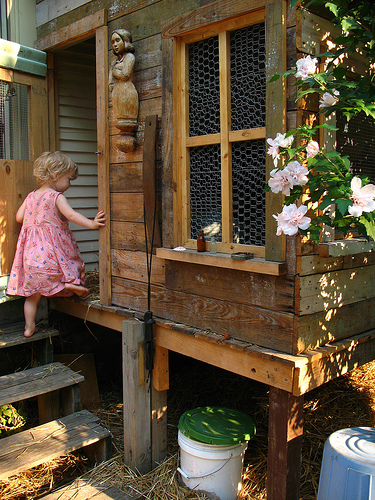

In [31]:
Image.open(train_img[0])

In [34]:
def preprocess(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    x -= 0.5
    x *= 2.

    return x

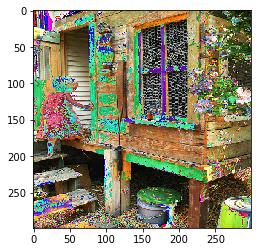

In [35]:
plt.imshow(np.squeeze(preprocess(train_img[0])))

In [38]:
model = InceptionV3(weights='imagenet')

In [39]:
from keras.models import Model

input_new = model.input
hidden_layer = model.layers[-2].output

new_model = Model(input_new, hidden_layer)

In [40]:
new_model.predict(preprocess(train_img[0]))

array([[ 0.12277606,  0.33294901,  0.75271726, ...,  0.21939676,
         0.30216339,  0.40283293]], dtype=float32)

In [0]:
def encode(image):
    image = preprocess(image)
    temp_enc = new_model.predict(image)
    temp_enc = np.reshape(temp_enc, temp_enc.shape[1])
    return temp_enc

In [35]:
train_encode = {}
for img in tqdm(train_img):
    train_encode[img[len(images):]] = encode(img)

100%|██████████| 6000/6000 [26:52<00:00,  3.72it/s]


In [0]:
with open("features.p", "wb") as pickle_train:
    pickle.dump(train_encode, pickle_train) 

In [0]:
train_encode = pickle.load(open('features.p', 'rb'))

In [42]:
test_encode = {}
for img in tqdm(test_img):
    test_encode[img[len(images):]] = encode(img)

100%|██████████| 1000/1000 [18:15<00:00,  1.10s/it]


In [0]:
with open("features_test.p", "wb") as pickle_test:
    pickle.dump(test_encode, pickle_test) 

In [0]:
encoding_test = pickle.load(open('features_test.p', 'rb'))

In [0]:
# train_d = dict()
train_d={}
for i in train_img:
    if i[len(images):] in d:
        train_d[i] = d[i[len(images):]]

In [48]:
len(train_d)

6000

In [49]:
train_d[images+'3556792157_d09d42bef7.jpg']

['A bunch of children sitting in chairs and standing on wooden floors .',
 'A group of children sit , stand , and kneel along a wall .',
 'A group of children sitting on folding chairs and playing .',
 'a young group of children sitting in a row against the wall .',
 'The kids talking while sitting on a row of chairs along the wall .']

In [0]:
test_d = {}
for i in test_img:
    if i[len(images):] in d:
        test_d[i] = d[i[len(images):]]

In [53]:
len(test_d)

1000

Calculating the unique words in the vocabulary.

In [0]:
cap = list()
for key, val in train_d.items():
    for i in val:
        cap.append('<S> ' + i + ' <E>')

In [0]:
words = [i.split() for i in cap]

In [0]:
unique_words = []
for i in words:
    unique_words.extend(i)
unique_words = list(set(unique_words))

In [0]:
with open("unique_words.p", "wb") as pickle_u:
    pickle.dump(unique_words, pickle_u) 

In [0]:
unique = pickle.load(open('unique_words.p', 'rb'))

In [0]:
word2idx = {val:index for index, val in enumerate(unique)}

In [0]:
idx2word = {index:val for index, val in enumerate(unique)}

In [67]:
max_len = 0
for c in caps:
    c = c.split()
    if len(c) > max_len:
        max_len = len(c)
max_len

40

In [68]:
len(unique), max_len

(8256, 40)

In [0]:
vocab_size = len(unique)

In [70]:
vocab_size

8256

Adding <start> and <end> to all the captions to indicate the starting and ending of a sentence. This will be used while we predict the caption of an image

In [71]:
f = open('Flickr8k_text/flickr8k_training_dataset.txt', 'w')
f.write("image_id\tcaptions\n")


18

In [0]:
for key, val in train_d.items():
    for i in val:
        f.write(key[len(images):] + "\t" + "<S> " + i +" <E>" + "\n")

f.close()

In [0]:
df = pd.read_csv('Flickr8k_text/flickr8k_training_dataset.txt', delimiter='\t')

In [74]:
len(df)

30000

In [75]:
c = [i for i in df['captions']]
len(c)

30000

In [0]:
imgs = [i for i in df['image_id']]

In [41]:
# a = c[-1]
# a, imgs[-1]

In [78]:
for i in a.split():
    print (i, "=>", word2idx[i])

<start> => 4225
Two => 2307
men => 1015
, => 7948
one => 889
with => 2199
purple => 689
hair => 4416
, => 7948
at => 2108
crowded => 2539
fountain => 1703
near => 2107
Seattle => 2260
Space => 4880
Needle => 7870
. => 7395
<end> => 224


In [0]:
samples_per_epoch = 0
for ca in cap:
    samples_per_epoch += len(ca.split())-1

In [110]:
samples_per_epoch

383454

## Generator 



In [0]:
def data_generator(batch_size = 32):
        partial_caps = []
        next_words = []
        images = []
        
        df = pd.read_csv('Flickr8k_text/flickr8k_training_dataset.txt', delimiter='\t')
        df = df.sample(frac=1)
        iter = df.iterrows()
        c = []
        imgs = []
        for i in range(df.shape[0]):
            x = next(iter)
            c.append(x[1][1])
            imgs.append(x[1][0])


        count = 0
        while True:
            for j, text in enumerate(c):
                current_image = encoding_train[imgs[j]]
                for i in range(len(text.split())-1):
                    count+=1
                    
                    partial = [word2idx[txt] for txt in text.split()[:i+1]]
                    partial_caps.append(partial)
                    
                    # Initializing with zeros to create a one-hot encoding matrix
                    # This is what we have to predict
                    # Hence initializing it with vocab_size length
                    n = np.zeros(vocab_size)
                    # Setting the next word to 1 in the one-hot encoded matrix
                    n[word2idx[text.split()[i+1]]] = 1
                    next_words.append(n)
                    
                    images.append(current_image)

                    if count>=batch_size:
                        next_words = np.asarray(next_words)
                        images = np.asarray(images)
                        partial_caps = sequence.pad_sequences(partial_caps, maxlen=max_len, padding='post')
                        yield [[images, partial_caps], next_words]
                        partial_caps = []
                        next_words = []
                        images = []
                        count = 0

## Let's create the model

In [51]:
embedding_size = 300

Input dimension is 4096 since we will feed it the encoded version of the image.

In [54]:
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(40))#max_len
caption_model = Sequential() 
caption_model.add(Embedding(8256, embedding_size, input_length=40))#max_len=40 vocab_size=8256
caption_model.add(LSTM(256, return_sequences=True))
caption_model.add(TimeDistributed(Dense(300)))
final_model = Sequential()
final_model.add(Merge([image_model, caption_model], mode='concat', concat_axis=1))
final_model.add(Bidirectional(LSTM(256, return_sequences=False)))
final_model.add(Dense(8256))#vocab_size=8256
final_model.add(Activation('softmax'))

e:\tensor2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  if __name__ == '__main__':


In [ ]:
#Second Model

In [57]:
from keras.layers import Input
from keras.layers import Dropout

def define_model(vocab_size, max_length):
    inputs1 = Input(shape=(40204896,))
    feature1 = Dropout(0.5)(inputs1)
    feature2 = Dense(256, activation='relu')(feature1)
    inputs2 = Input(shape=(max_length,))
    sequence1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    sequence2 = Dropout(0.5)(sequence1)
    sequence3 = LSTM(256)(sequence2)
    decoder1 = add([feature2, sequence3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    print(model.summary())
    return model

In [58]:
define_model(8256,40)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 40204896)     0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 40, 256)      2113536     input_8[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 40204896)     0           input_7[0][0]                    
__________________________________________________________________________________________________
dropout_6 

In [0]:
final_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [106]:
final_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 80, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1140736   
_________________________________________________________________
dense_3 (Dense)              (None, 8256)              4235328   
_________________________________________________________________
activation_95 (Activation)   (None, 8256)              0         
Total params: 9,115,032
Trainable params: 9,115,032
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("model")
final_model.fit_generator(data_generator(batch_size=32), samples_per_epoch=samples_per_epoch, nb_epoch=1)
                          

model
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=383454, epochs=1)`
  


   233/383454 [..............................] - ETA: 38:45:57 - loss: 16.0338 - acc: 0.0052

In [0]:
final_model.save_weights('saved_caption_weight.h5')

In [0]:
final_model.load_weights('saved_caption_weight.h5')

## Predict funtion

In [0]:
def predict_captions(image):
    start = ["<S>"]
    while True:
        par_caps = [word2idx[i] for i in start]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        e = encoding_test[image[len(images):]]
        preds = final_model.predict([np.array([e]), np.array(par_caps)])
        word_pred = idx2word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<E>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

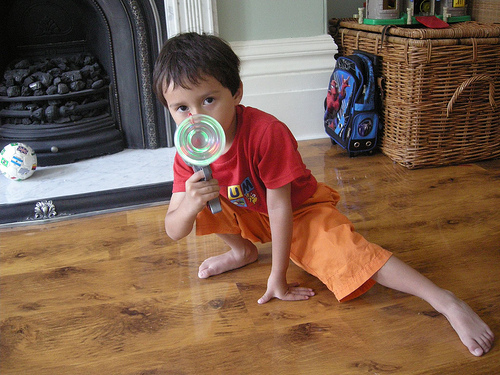

In [94]:
try_image = test_img[0]
Image.open(try_image)

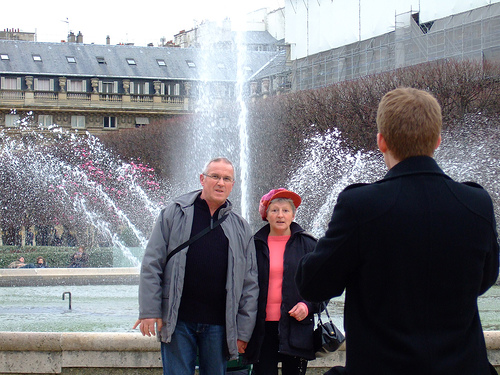

In [0]:
try_image3 = test_img[851]
Image.open(try_image3)

In [59]:
print (predict_captions(try_image3)) 


A man and a woman are standing in front of a building
